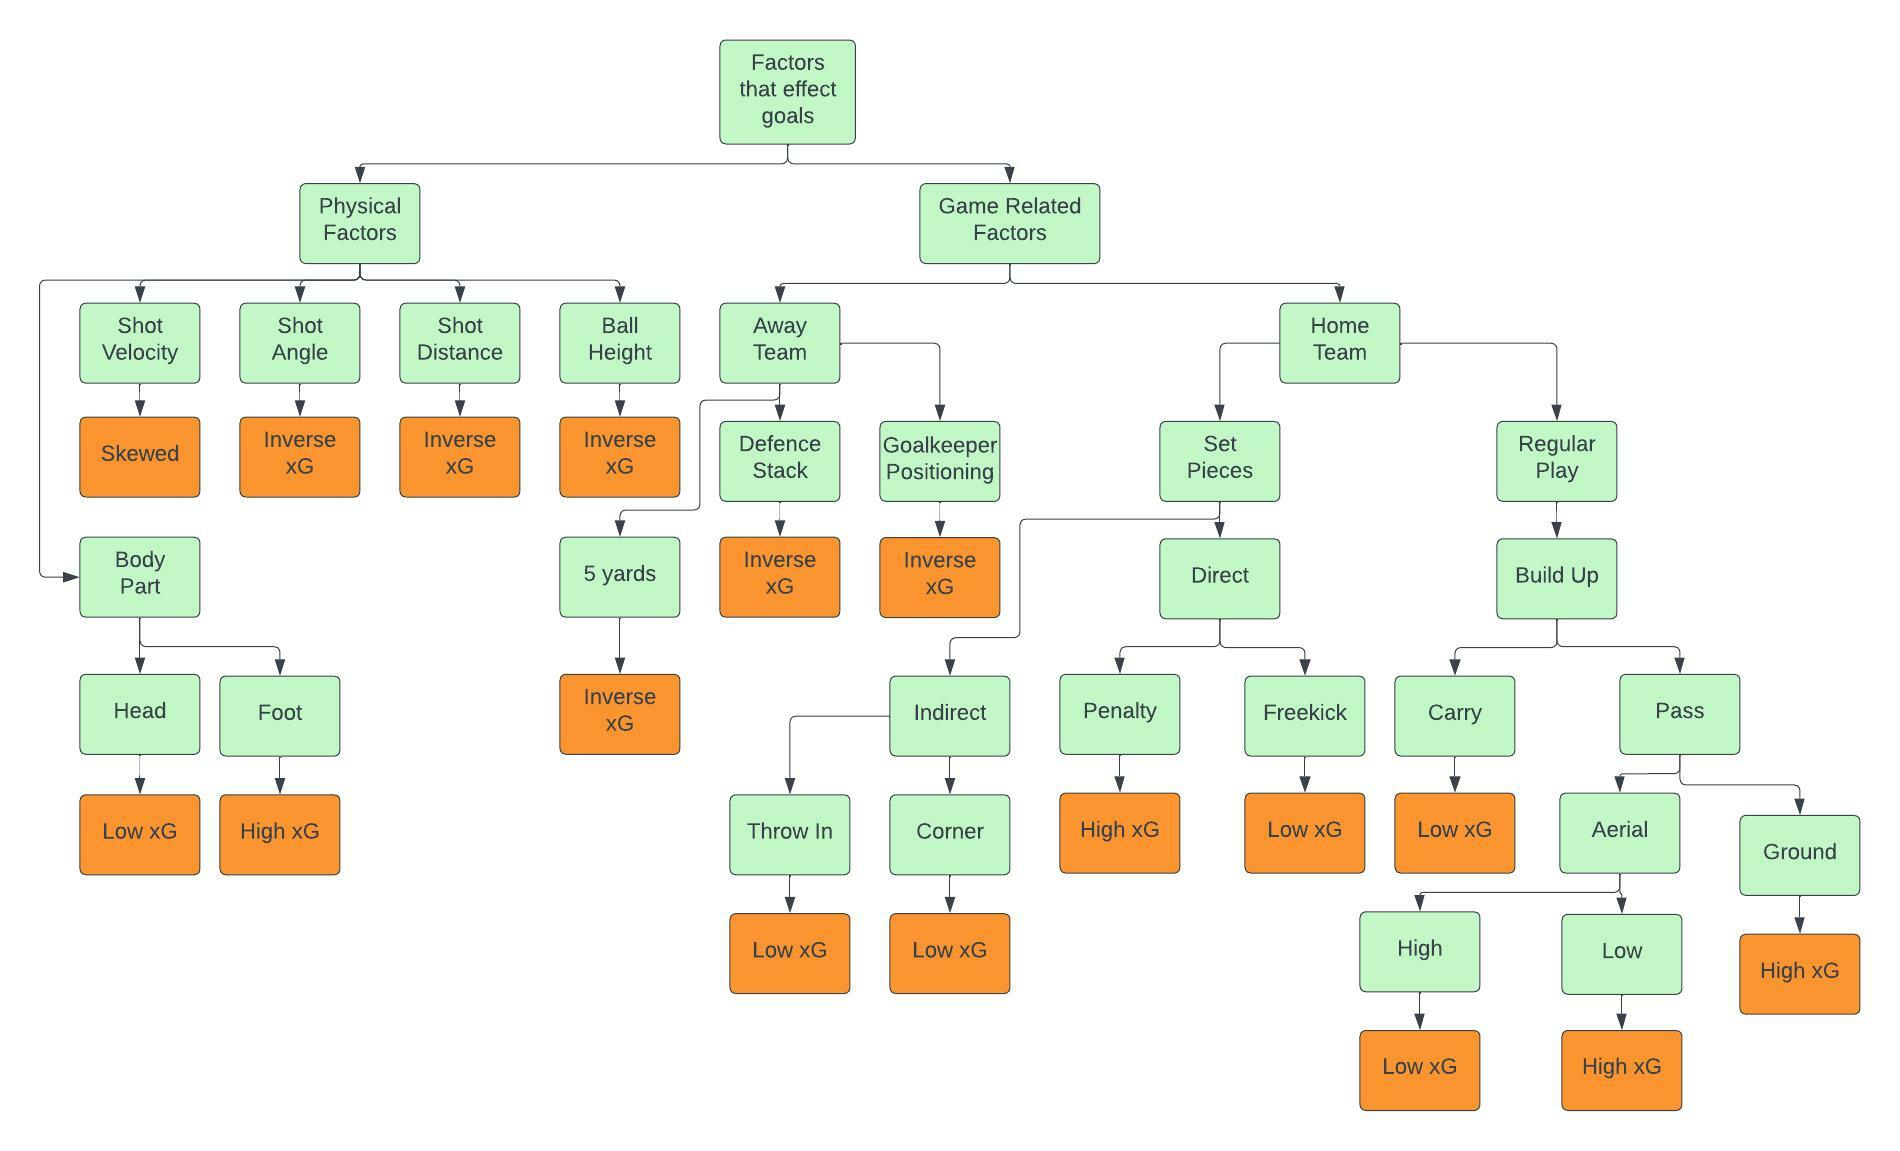

In [ ]:
!pip install import-ipynb
!pip install eli5
!pip install shap
!pip install lime
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.0 MB/s 
     |████████████████████████████████| 133 kB 44.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a97f00a026b4d3f9b005d269d4fe735c5803d16144e5263e433fc0e2a71e035a
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 71 kB/s 


In [ ]:
# importing the tools to call google drive
from google.colab import drive


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import uniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, log_loss,roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
import pickle as pkl

import eli5
import shap
import lime 
import yellowbrick
import import_ipynb

In [ ]:
# mount our directory
mount='/content/gdrive'
drive.mount(mount, force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Switch to the directory on the VM for our purposes
drive_root=mount + '/My Drive/Colab Notebooks/Thesis'
%cd $drive_root
%pwd

/content/gdrive/My Drive/Colab Notebooks/Thesis


'/content/gdrive/My Drive/Colab Notebooks/Thesis'

In [ ]:
import Pitch_Plot
import Half_Pitch
import data
from data import obtain_seasons,fetch_url,Game
from Pitch_Plot import pitchplot
from Half_Pitch import halfpitchplot

importing Jupyter notebook from Pitch_Plot.ipynb
importing Jupyter notebook from Half_Pitch.ipynb
importing Jupyter notebook from data.ipynb


In [ ]:
df = pd.read_pickle('./final_data.pkl')

In [ ]:
df.columns

Index(['shot id', 'play pattern', 'x location shot', 'y location shot',
       'duration', 'outcome', 'technique used', 'first time', 'x gk location',
       'y gk location', 'body part', 'type of shot',
       'Number of opponents in 5 yards', 'Players between goal', 'player name',
       'Team Name', 'official xg', 'Pass id', 'Pass Type', 'game_id',
       'season_id', 'distance_from_goalpost_a', 'distance_from_goalpost_b',
       'shot_angle'],
      dtype='object')

In [ ]:
df['shot distance'] = round(np.sqrt((df['x location shot']-120)**2+(df['y location shot']-40)**2),1)

In [ ]:
df['gk distance'] = round(np.sqrt((df['x gk location']-120)**2+(df['y gk location']-40)**2),1)
df

shot id    play pattern  x location shot  \
0      56deeffa-ff55-429e-91df-41f237a3ebac    Regular Play            103.7   
1      00d9c066-1078-4e1c-8c7f-2ca299e3a5f0  From Free Kick            107.4   
2      48706448-928f-4721-96ec-2b813f448937    Regular Play            108.5   
3      718f8a06-078c-489e-9423-63d414be5e43   From Throw In            106.0   
4      e1b29724-4861-4d12-9a51-ac6635e97438     From Corner            112.4   
...                                     ...             ...              ...   
23512  4468faac-ae6a-4637-928b-fc7dd448411b  From Free Kick             91.1   
23513  5f613006-c00e-4581-882c-a7a81978ebf0   From Throw In            103.7   
23514  717c9351-6eff-4f71-969a-e25bab5bfcb6   From Throw In            107.9   
23515  0c914938-af14-479e-8043-8e4bfdfd474d   From Throw In            117.8   
23516  d9533117-d840-4973-91cd-9472a76d705e  From Free Kick            108.5   

       y location shot  duration outcome technique used  first time  \
0                 46.3  0.909600   Saved         Normal        True   
1                 37.4  1.033500    Goal         Normal       False   
2                 48.1  1.391602   Off T         Normal       False   
3                 43.7  1.154700   Saved         Normal       False   
4                 42.9  0.907511   Off T         Normal       False   
...                ...       ...     ...            ...         ...   
23512             47.1  1.622413    Post         Normal       False   
23513             33.6  1.070861   Off T    Half Volley       False   
23514             37.0  0.701300   Saved         Volley        True   
23515             43.9  1.256200    Post         Normal       False   
23516             45.6  1.316500   Off T         Normal       False   

       x gk location  y gk location  ... official xg  \
0              116.0           43.0  ...    0.174474   
1              118.3           39.9  ...    0.028797   
2              118.9           42.8  ...    0.027564   
3              118.9           42.1  ...    0.025206   
4              119.3           40.7  ...    0.065884   
...              ...            ...  ...         ...   
23512          118.4           40.8  ...    0.049559   
23513          119.5           39.8  ...    0.057103   
23514          119.2           39.6  ...    0.113389   
23515          118.9           43.3  ...    0.415576   
23516          119.6           41.4  ...    0.051609   

                                    Pass id    Pass Type  game_id  season_id  \
0      448cb3aa-ee0b-4829-a7d4-bdef6dfda5bd  Ground Pass    68311       2019   
1      f5d55ee4-2db3-4604-b9fa-8bd0645fdc4b    High Pass    68311       2019   
2      13eaef4e-1393-4b99-b94d-d60c35070713    High Pass    68311       2019   
3      be417f5e-798b-4dd0-a651-4b7a9d2e3564    High Pass    68311       2019   
4      ef4852cb-22f5-4afe-8355-5ec0752f9adb    High Pass    68311       2019   
...                                     ...          ...      ...        ...   
23512                               No Pass         None    68353  2004/2005   
23513                               No Pass         None    68353  2004/2005   
23514  dbaca88f-32d3-4abe-a37d-4fceb67a4302     Low Pass    68353  2004/2005   
23515                               No Pass         None    68353  2004/2005   
23516  f2137b0f-01b5-4311-8eea-955918e63892    High Pass    68353  2004/2005   

      distance_from_goalpost_a  distance_from_goalpost_b shot_angle  \
0                    19.281597                 16.461470       24.3   
1                    12.677539                 14.223924       34.0   
2                    16.693112                 12.209013       26.8   
3                    15.977797                 14.003214       30.0   
4                    10.264989                  7.679193       50.5   
...                        ...                       ...        ...   
23512                30.958359                 29.065787       14.9   
23513               

In [ ]:
Goal_label = []
binary_outcome = []
for outcome in df['outcome'].values:
    if outcome == 'Goal':
        Goal_label.append('Goal')
        binary_outcome.append(1)
    else:
        Goal_label.append('Not Goal')
        binary_outcome.append(0)
df['Goal_label'] = Goal_label
df['binary_outcome'] = binary_outcome

In [ ]:
df = df.set_index("shot id")

In [ ]:
df_laliga = pd.read_pickle('./laliga_data.pkl')

In [ ]:
df_laliga['shot distance'] = round(np.sqrt((df_laliga['x location shot']-120)**2+(df_laliga['y location shot']-40)**2),1)

In [ ]:
df_laliga['gk distance'] = round(np.sqrt((df_laliga['x gk location']-120)**2+(df_laliga['y gk location']-40)**2),1)

In [ ]:
Goal_label = []
binary_outcome = []
for outcome in df_laliga['outcome'].values:
    if outcome == 'Goal':
        Goal_label.append('Goal')
        binary_outcome.append(1)
    else:
        Goal_label.append('Not Goal')
        binary_outcome.append(0)
df_laliga['Goal_label'] = Goal_label
df_laliga['binary_outcome'] = binary_outcome

In [ ]:
df_laliga = df_laliga.set_index("shot id")

In [ ]:
df_laliga['type of shot'].unique()

array(['Open Play', 'Penalty', 'Free Kick', 'Corner'], dtype=object)

In [ ]:
df_laliga['body part']

shot id
859f0f2d-6b33-49a3-9397-64d2ab927a73    Right Foot
7a1b1dcb-4e09-4bfa-9827-9d81b6944bc5     Left Foot
5078ef4c-43ea-4e5e-90cc-8c288349b3e3     Left Foot
3b87f877-45b9-425c-8d0c-035975f7f0cf    Right Foot
06c3d431-8ac3-43fa-9585-d9689f7a44f3    Right Foot
                                           ...    
4468faac-ae6a-4637-928b-fc7dd448411b     Left Foot
5f613006-c00e-4581-882c-a7a81978ebf0     Left Foot
717c9351-6eff-4f71-969a-e25bab5bfcb6    Right Foot
0c914938-af14-479e-8043-8e4bfdfd474d    Right Foot
d9533117-d840-4973-91cd-9472a76d705e          Head
Name: body part, Length: 12841, dtype: object

In [ ]:
body_part_list=[]
for bodypart in df_laliga['body part'].values:
    if (bodypart=='Right Foot') or (bodypart=='Left Foot'):
        body_part_list.append('Foot')
    elif (bodypart=='Head'):
        body_part_list.append('Head')
    else:
        body_part_list.append('Other')

In [ ]:
df_laliga['body part']=body_part_list
df_laliga['body part'].value_counts()

Foot     11197
Head      1611
Other       33
Name: body part, dtype: int64

In [ ]:
df_laliga=df_laliga[df_laliga['body part'] != 'Other']
df_laliga['body part'].value_counts()

Foot    11197
Head     1611
Name: body part, dtype: int64

In [ ]:
df_laliga['play pattern']

shot id
859f0f2d-6b33-49a3-9397-64d2ab927a73      From Counter
7a1b1dcb-4e09-4bfa-9827-9d81b6944bc5     From Throw In
5078ef4c-43ea-4e5e-90cc-8c288349b3e3      Regular Play
3b87f877-45b9-425c-8d0c-035975f7f0cf     From Throw In
06c3d431-8ac3-43fa-9585-d9689f7a44f3     From Throw In
                                             ...      
4468faac-ae6a-4637-928b-fc7dd448411b    From Free Kick
5f613006-c00e-4581-882c-a7a81978ebf0     From Throw In
717c9351-6eff-4f71-969a-e25bab5bfcb6     From Throw In
0c914938-af14-479e-8043-8e4bfdfd474d     From Throw In
d9533117-d840-4973-91cd-9472a76d705e    From Free Kick
Name: play pattern, Length: 12808, dtype: object

In [ ]:
key_pass_pattern_list =[]
for pattern in df_laliga['play pattern'].values:
    if pattern=='None':
        key_pass_pattern_list.append('None')
    else:
        if (pattern=='Regular Play'):
            key_pass_pattern_list.append('Regular Play')
        else:
            key_pass_pattern_list.append('Non Regular Play') 

In [ ]:
df_laliga['play pattern']=key_pass_pattern_list
df_laliga['play pattern'].value_counts()

Non Regular Play    8292
Regular Play        4516
Name: play pattern, dtype: int64

In [ ]:
df_laliga['type of shot'].value_counts()

Open Play    11670
Free Kick      973
Penalty        164
Corner           1
Name: type of shot, dtype: int64

In [ ]:
df_laliga = df_laliga[df_laliga['type of shot']=='Open Play']
df_laliga['type of shot'].value_counts()

Open Play    11670
Name: type of shot, dtype: int64

In [ ]:
df_laliga.isna().any()

play pattern                      False
x location shot                   False
y location shot                   False
duration                          False
outcome                           False
technique used                    False
first time                        False
x gk location                     False
y gk location                     False
body part                         False
type of shot                      False
Number of opponents in 5 yards    False
Players between goal              False
player name                       False
Team Name                         False
official xg                       False
Pass id                           False
Pass Type                         False
game_id                           False
season_id                         False
distance_from_goalpost_a          False
distance_from_goalpost_b          False
shot_angle                        False
shot distance                     False
gk distance                       False


# Creating training, testing and validation data


In [ ]:
features = df_laliga.drop(["binary_outcome"], axis=1)
targets = df_laliga["binary_outcome"]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(features.loc[X_train.index], targets[X_train.index], test_size=0.2)

train = pd.merge(X_train, y_train, left_index=True, right_index=True)
validate = pd.merge(X_valid, y_valid, left_index=True, right_index=True)
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [ ]:
train.columns

Index(['play pattern', 'x location shot', 'y location shot', 'duration',
       'outcome', 'technique used', 'first time', 'x gk location',
       'y gk location', 'body part', 'type of shot',
       'Number of opponents in 5 yards', 'Players between goal', 'player name',
       'Team Name', 'official xg', 'Pass id', 'Pass Type', 'game_id',
       'season_id', 'distance_from_goalpost_a', 'distance_from_goalpost_b',
       'shot_angle', 'shot distance', 'gk distance', 'Goal_label',
       'binary_outcome'],
      dtype='object')

In [ ]:
y_train.head(55)

shot id
61015a50-8a69-4a6e-9a10-428efef13a3c    0
2f4a8687-01b5-4a36-865b-f93b51887890    0
a2e9017f-f617-49b1-8fa4-df618e6cc76f    0
67c1b17b-7f81-4222-b0b6-bf8291089fc0    0
db163acf-6106-4897-b794-77e5e244cb2f    0
87f447f4-8f64-40a9-9469-8a94eae4637f    0
0f05f8c4-cb02-46f2-a837-841dbaf05842    0
b05e1297-1e24-4ffd-8f68-485afe180e5b    0
cf1d5982-54d5-4997-963f-baa56b17e2de    0
9983e209-e754-4a77-906e-585b67fc5a35    1
21ec6937-1f2b-494c-9bde-b05a327c18b6    0
fcaf7a84-3550-4139-bdb4-4caa6cdd36df    0
66562ea0-6020-46d5-84a7-42d071a0c37a    1
c083aef4-bef7-4283-8449-74c64b7fcfe2    0
e5b7d384-b9e1-4339-85f6-779cac272d89    0
770fe2e4-4b6c-4250-a9da-d95acab51e7b    0
66af161f-af2a-4879-9302-5f8d81c1df3b    0
cc2b65e9-7903-46a1-b39b-1aa075e94f76    0
4ad4534f-a8cb-4502-a248-176858701145    1
3d5d3db9-6452-416b-bd59-81e4cf516aef    1
40909454-6b0b-43e0-8733-148ecf7e2453    1
814f31b3-c7d8-4ff7-98d7-69d246a17bfb    0
d12189b9-27d8-476c-b9b5-089250f37ad5    0
6a1ef7d8-d851-464a-8d75-16

In [ ]:
with open('laliga.pickle', 'rb') as handle:
    laliga = pkl.load(handle)

In [ ]:
train

play pattern  x location shot  \
shot id                                                                   
61015a50-8a69-4a6e-9a10-428efef13a3c      Regular Play            102.4   
2f4a8687-01b5-4a36-865b-f93b51887890      Regular Play             91.7   
a2e9017f-f617-49b1-8fa4-df618e6cc76f      Regular Play            100.8   
67c1b17b-7f81-4222-b0b6-bf8291089fc0      Regular Play            105.8   
db163acf-6106-4897-b794-77e5e244cb2f  Non Regular Play             90.8   
...                                                ...              ...   
20c739f8-a754-45d3-a862-7cb8916e8790      Regular Play             92.4   
29021c89-986c-409b-b0de-77194e610bb6      Regular Play            100.6   
bd56f03e-33f6-4a33-82f8-4166a89e3582  Non Regular Play            113.2   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16  Non Regular Play            109.8   
89be0308-3b31-481d-8af5-ac7bd324a863      Regular Play            110.6   

                                      y location shot  duration  outcome  \
shot id                                                                    
61015a50-8a69-4a6e-9a10-428efef13a3c             32.0  0.992996    Saved   
2f4a8687-01b5-4a36-865b-f93b51887890             46.1  0.373800  Blocked   
a2e9017f-f617-49b1-8fa4-df618e6cc76f             45.6  0.055375  Blocked   
67c1b17b-7f81-4222-b0b6-bf8291089fc0             43.0  1.199785    Saved   
db163acf-6106-4897-b794-77e5e244cb2f             53.1  0.999104    Saved   
...                                               ...       ...      ...   
20c739f8-a754-45d3-a862-7cb8916e8790             42.0  0.982300    Saved   
29021c89-986c-409b-b0de-77194e610bb6             48.7  1.087347    Off T   
bd56f03e-33f6-4a33-82f8-4166a89e3582             28.9  0.556224    Saved   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16             47.5  1.491700    Off T   
89be0308-3b31-481d-8af5-ac7bd324a863             28.5  1.083300     Goal   

                                     technique used  first time  \
shot id                                                           
61015a50-8a69-4a6e-9a10-428efef13a3c         Normal       False   
2f4a8687-01b5-4a36-865b-f93b51887890         Normal       False   
a2e9017f-f617-49b1-8fa4-df618e6cc76f         Normal       False   
67c1b17b-7f81-4222-b0b6-bf8291089fc0         Normal       False   
db163acf-6106-4897-b794-77e5e244cb2f         Normal       False   
...                                             ...         ...   
20c739f8-a754-45d3-a862-7cb8916e8790         Normal       False   
29021c89-986c-409b-b0de-77194e610bb6    Half Volley        True   
bd56f03e-33f6-4a33-82f8-4166a89e3582         Volley        True   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16         Normal       False   
89be0308-3b31-481d-8af5-ac7bd324a863            Lob       False   

                                      x gk location  y gk location body part  \
shot id                                                                        
61015a50-8a69-4a6e-9a10-428efef13a3c          118.7           40.3      Foot   
2f4a8687-01b5-4a36-865b-f93b51887890          118.2           40.9      Foot   
a2e9017f-f617-49b1-8fa4-df618e6cc76f          117.4           40.3      Foot   
67c1b17b-7f81-4222-b0b6-bf8291089fc0          119.4           41.1      Head   
db163acf-6106-4897-b794-77e5e244cb2f          119.1           41.2      Foot   
...                                             ...            ...       ...   
20c739f8-a754-45d3-a862-7cb8916e8790          118.6           39.9      Foot   
29021c89-986c-409b-b0de-77194e610bb6          119.8           40.5      Foot   
bd56f03e-33f6-4a33-82f8-4166a89e3582          118.9           39.8      Foot   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16          118.8           41.0      Head   
89be0308-3b31-481d-8af5-ac7bd324a863          113.6           31.4      Foot   

                                      ...    Pass Type  game_id  season_id  \
shot id                               ...                                    
61015a50

In [ ]:
df_regular_play = train[train['type of shot']=='Open Play']
df_regular_play

play pattern  x location shot  \
shot id                                                                   
61015a50-8a69-4a6e-9a10-428efef13a3c      Regular Play            102.4   
2f4a8687-01b5-4a36-865b-f93b51887890      Regular Play             91.7   
a2e9017f-f617-49b1-8fa4-df618e6cc76f      Regular Play            100.8   
67c1b17b-7f81-4222-b0b6-bf8291089fc0      Regular Play            105.8   
db163acf-6106-4897-b794-77e5e244cb2f  Non Regular Play             90.8   
...                                                ...              ...   
20c739f8-a754-45d3-a862-7cb8916e8790      Regular Play             92.4   
29021c89-986c-409b-b0de-77194e610bb6      Regular Play            100.6   
bd56f03e-33f6-4a33-82f8-4166a89e3582  Non Regular Play            113.2   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16  Non Regular Play            109.8   
89be0308-3b31-481d-8af5-ac7bd324a863      Regular Play            110.6   

                                      y location shot  duration  outcome  \
shot id                                                                    
61015a50-8a69-4a6e-9a10-428efef13a3c             32.0  0.992996    Saved   
2f4a8687-01b5-4a36-865b-f93b51887890             46.1  0.373800  Blocked   
a2e9017f-f617-49b1-8fa4-df618e6cc76f             45.6  0.055375  Blocked   
67c1b17b-7f81-4222-b0b6-bf8291089fc0             43.0  1.199785    Saved   
db163acf-6106-4897-b794-77e5e244cb2f             53.1  0.999104    Saved   
...                                               ...       ...      ...   
20c739f8-a754-45d3-a862-7cb8916e8790             42.0  0.982300    Saved   
29021c89-986c-409b-b0de-77194e610bb6             48.7  1.087347    Off T   
bd56f03e-33f6-4a33-82f8-4166a89e3582             28.9  0.556224    Saved   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16             47.5  1.491700    Off T   
89be0308-3b31-481d-8af5-ac7bd324a863             28.5  1.083300     Goal   

                                     technique used  first time  \
shot id                                                           
61015a50-8a69-4a6e-9a10-428efef13a3c         Normal       False   
2f4a8687-01b5-4a36-865b-f93b51887890         Normal       False   
a2e9017f-f617-49b1-8fa4-df618e6cc76f         Normal       False   
67c1b17b-7f81-4222-b0b6-bf8291089fc0         Normal       False   
db163acf-6106-4897-b794-77e5e244cb2f         Normal       False   
...                                             ...         ...   
20c739f8-a754-45d3-a862-7cb8916e8790         Normal       False   
29021c89-986c-409b-b0de-77194e610bb6    Half Volley        True   
bd56f03e-33f6-4a33-82f8-4166a89e3582         Volley        True   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16         Normal       False   
89be0308-3b31-481d-8af5-ac7bd324a863            Lob       False   

                                      x gk location  y gk location body part  \
shot id                                                                        
61015a50-8a69-4a6e-9a10-428efef13a3c          118.7           40.3      Foot   
2f4a8687-01b5-4a36-865b-f93b51887890          118.2           40.9      Foot   
a2e9017f-f617-49b1-8fa4-df618e6cc76f          117.4           40.3      Foot   
67c1b17b-7f81-4222-b0b6-bf8291089fc0          119.4           41.1      Head   
db163acf-6106-4897-b794-77e5e244cb2f          119.1           41.2      Foot   
...                                             ...            ...       ...   
20c739f8-a754-45d3-a862-7cb8916e8790          118.6           39.9      Foot   
29021c89-986c-409b-b0de-77194e610bb6          119.8           40.5      Foot   
bd56f03e-33f6-4a33-82f8-4166a89e3582          118.9           39.8      Foot   
2e3e7ea4-097c-4bf3-8f30-d0847af76f16          118.8           41.0      Head   
89be0308-3b31-481d-8af5-ac7bd324a863          113.6           31.4      Foot   

                                      ...    Pass Type  game_id  season_id  \
shot id                               ...                                    
61015a50

Let's check how distance has an affect on expected goals followed by angle.

In [ ]:
def goals(fig,locations,color,label):
    x = []
    y = []
    for location in locations:
        x.append(location[0])
        y.append(location[1])        
    plt.scatter(x,y,c=color,alpha=0.6,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    return fig

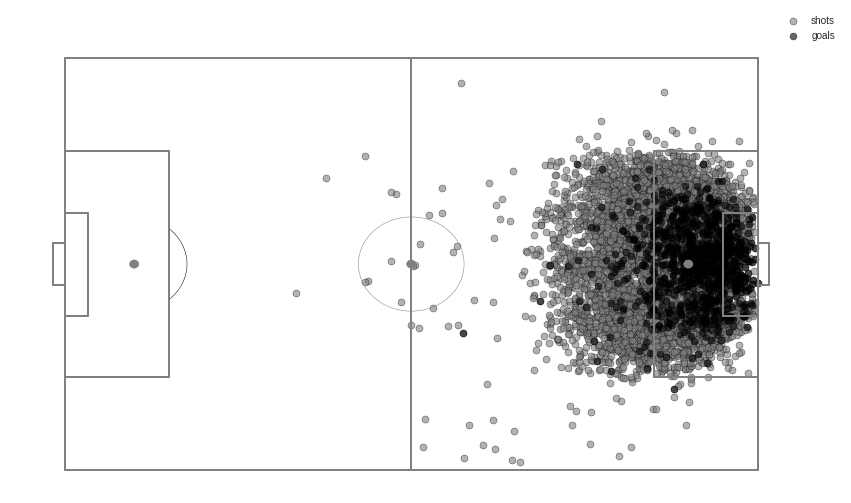

In [ ]:
pitch = pitchplot()
pitch = goals(plt,train[['x location shot','y location shot']].values,'grey','shots')
pitch = goals(plt,train[train['Goal_label']=='Goal'][['x location shot','y location shot']].values,'black','goals')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def allgoals(fig,df):    
    sns.histplot(data=df_regular_play, x="x location shot", y="y location shot",cbar=True,cbar_kws=dict(shrink=.25), pmax=0.85, palette='Reds')
    #px.density_heatmap(df_regular_play, x="x location shot",y ="y location shot")
    plt.axis('off')
    return plt

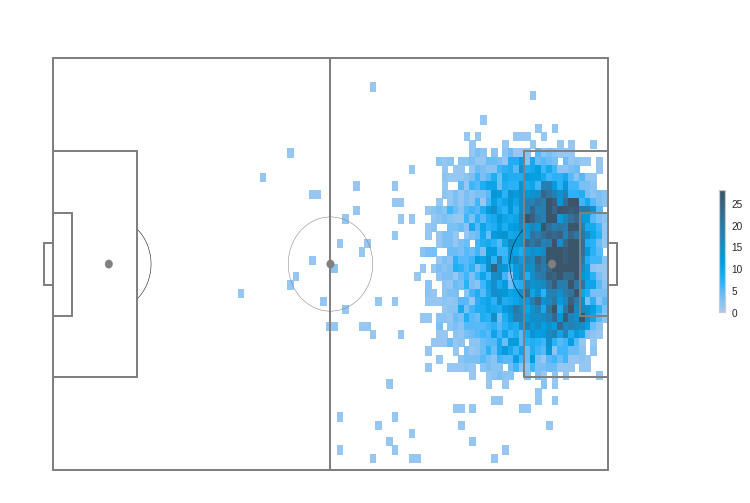

In [ ]:
df_goals = df_regular_play[df_regular_play['Goal_label']=='Goal']
pitch = pitchplot()
pitch = allgoals(pitch,df_goals)
plt.show()

In [ ]:
def playergoals(fig,df,player):    
    df_player = df[df['player name'] == player]
    sns.histplot(data=df_player, x="x location shot", y="y location shot",cbar=True,cbar_kws=dict(shrink=.25), pmax=1)
    plt.title(player, fontsize = 30)
    #px.density_heatmap(df_regular_play, x="x location shot",y ="y location shot")
    plt.axis('off')
    return plt

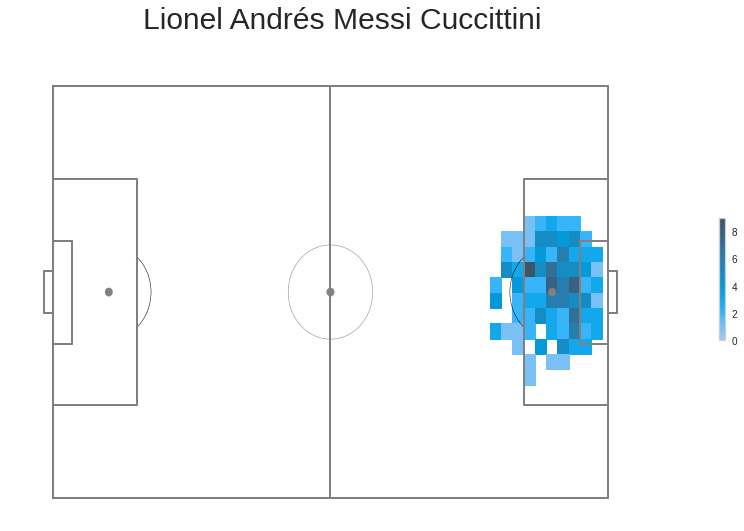

In [ ]:
df_goals = df_regular_play[df_regular_play['Goal_label']=='Goal']
pitch = pitchplot()
pitch = playergoals(pitch,df_goals,'Lionel Andrés Messi Cuccittini')
plt.show()

In [ ]:
distance = train[["shot distance", "binary_outcome"]]
distance["shot distance"] = distance["shot distance"].floordiv(5)
distance["binary_outcome"] = pd.to_numeric(distance["binary_outcome"]) * 100
outcome = distance.groupby("shot distance").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


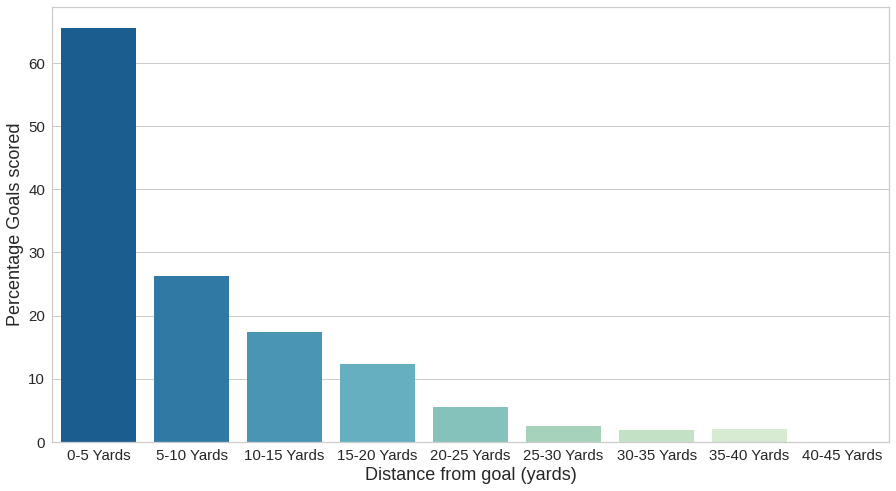

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(data=outcome,x="shot distance", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(9), ("0-5 Yards", "5-10 Yards", "10-15 Yards", "15-20 Yards", "20-25 Yards", "25-30 Yards", "30-35 Yards", "35-40 Yards", "40-45 Yards"))
plt.xlabel("Distance from goal (yards)", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

Clearly the number of goals are reducing as the distance is increasing. Most of the goals are scored from within the box.

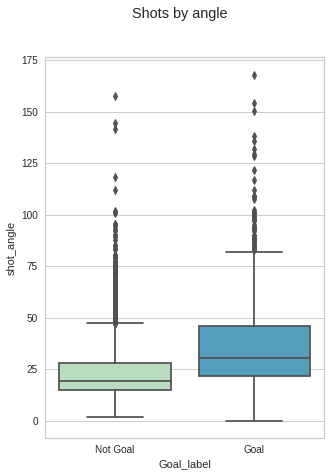

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by angle')
sns.boxplot(x='Goal_label',y='shot_angle',data=df_regular_play, palette = 'GnBu')

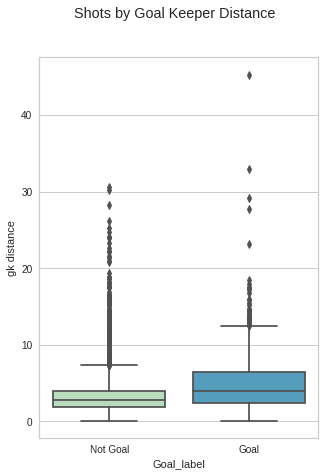

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Distance')
sns.boxplot(x='Goal_label',y='gk distance',data=df_regular_play, palette = 'GnBu')

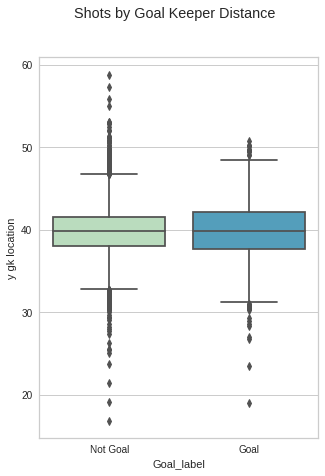

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Distance')
sns.boxplot(x='Goal_label',y='y gk location',data=df_regular_play, palette = 'GnBu')

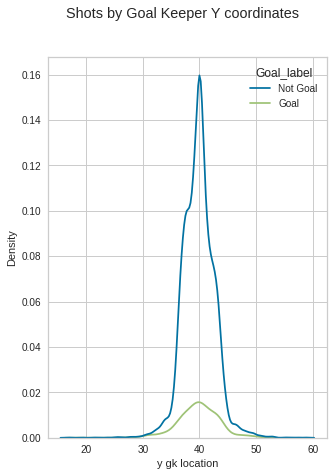

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Y coordinates')
#sns.boxplot(x='Goal_label',y='y gk location',data=df_regular_play, palette = 'GnBu')
sns.kdeplot(data=df_regular_play, x="y gk location", hue="Goal_label")

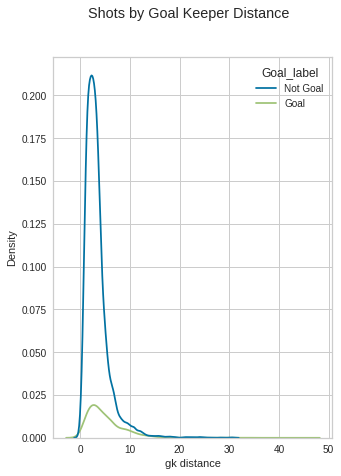

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,7))
fig.suptitle('Shots by Goal Keeper Distance')
#sns.boxplot(x='Goal_label',y='y gk location',data=df_regular_play, palette = 'GnBu')
sns.kdeplot(data=df_regular_play, x="gk distance", hue="Goal_label")

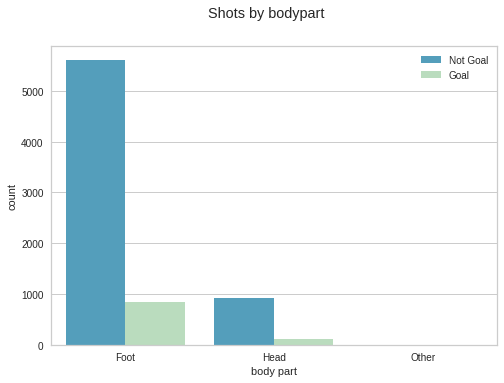

In [ ]:
fig,ax=plt.subplots(1,1)
fig.suptitle('Shots by bodypart')
sns.countplot(x='body part',order=['Foot','Head','Other'],hue='Goal_label',data=df_regular_play, palette = 'GnBu_r')
plt.legend(loc='upper right')

In [ ]:
footed_shots = (df_regular_play['body part']=='Foot')
shots_from_foot = df_regular_play[footed_shots].shape[0]
goals_from_foot = sum(df_regular_play[footed_shots]['binary_outcome'])

headed_shots = (df_regular_play['body part']=='Head')
shots_from_head = df_regular_play[headed_shots].shape[0]
goals_from_head = sum(df_regular_play[headed_shots]['binary_outcome'])

feetperc = goals_from_foot/shots_from_foot
headperc = goals_from_head/shots_from_head

print(feetperc*100,'%')
print(headperc*100,'%')

13.12974732599597 %
10.32448377581121 %


This shows that headed goals are more effective than footed goals. There is a skewness that we need to consider first.

Text(0.5, 1.0, 'Headed Shots')

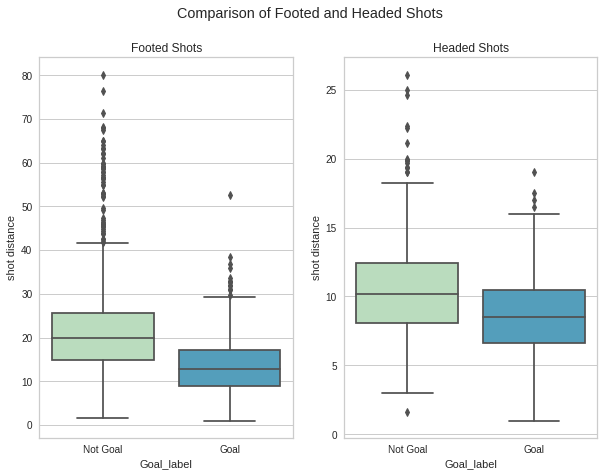

In [ ]:
fig,axis = plt.subplots(1,2, figsize=(10,7))
fig.suptitle('Comparison of Footed and Headed Shots')
sns.boxplot(x='Goal_label',y='shot distance',data=df_regular_play[footed_shots],ax=axis[0],palette='GnBu')
sns.boxplot(x='Goal_label',y='shot distance',data=df_regular_play[headed_shots],ax=axis[1],palette='GnBu')
axis[0].set_title('Footed Shots')
axis[1].set_title('Headed Shots')

This figure shows that almost all headed shots are taken from a maximum distance of 18 yards.

In [ ]:
eighteen_yardf = df_regular_play[footed_shots]['shot distance']<18
footed18_shots = df_regular_play[footed_shots][eighteen_yardf].shape[0]
footed18_goals = sum(df_regular_play[footed_shots][eighteen_yardf]['binary_outcome'])

eighteen_yardh = df_regular_play[headed_shots]['shot distance']<18
headed18_shots = df_regular_play[headed_shots][eighteen_yardh].shape[0]
headed18_goals = sum(df_regular_play[headed_shots][eighteen_yardh]['binary_outcome'])

feetperc18 = footed18_goals/footed18_shots
headperc18 = headed18_goals/headed18_shots

print(feetperc18*100,'%')
print(headperc18*100,'%')

22.803418803418804 %
10.41041041041041 %


After checking the goals from the 18 yard distance, it is clear that the footed goals are more effective. 

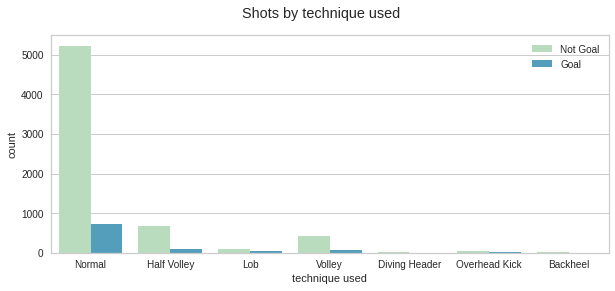

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(10,4))
fig.suptitle('Shots by technique used')
sns.countplot(x='technique used',hue='Goal_label',data=df_regular_play, palette = 'GnBu')
plt.legend(loc='upper right')

In [ ]:
normal_shots = (df_regular_play['technique used']=='Normal') 
volley_shots = (df_regular_play['technique used']=='Volley')
halfvolley_shots = (df_regular_play['technique used']=='Half Volley')
other_shots = (df_regular_play['technique used']=='Lob technique used') | (df_regular_play['technique used']!='Backheel') | (df_regular_play['technique used']!='Diving Header') | (df_regular_play['technique used']!='Overhead Kick')

In [ ]:
shots_normal = df_regular_play[normal_shots].shape[0]
goals_normal = sum(df_regular_play[normal_shots]['binary_outcome'])
perc_normal = goals_normal/shots_normal*100

shots_volley = df_regular_play[volley_shots].shape[0]
goals_volley = sum(df_regular_play[volley_shots]['binary_outcome'])
perc_volley = goals_volley/shots_volley*100

shots_halfvolley = df_regular_play[halfvolley_shots].shape[0]
goals_halfvolley = sum(df_regular_play[halfvolley_shots]['binary_outcome'])
perc_halfvolley = goals_halfvolley/shots_halfvolley*100

shots_other = df_regular_play[other_shots].shape[0]
goals_other = sum(df_regular_play[other_shots]['binary_outcome'])
perc_other = goals_other/shots_other*100

print(perc_normal)
print(perc_volley)
print(perc_halfvolley)
print(perc_other)

12.351065615036081
12.708333333333332
10.894941634241246
12.747723620782004


In [ ]:
play_pattern = train[["technique used", "binary_outcome"]]
play_pattern["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = play_pattern.groupby("technique used").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


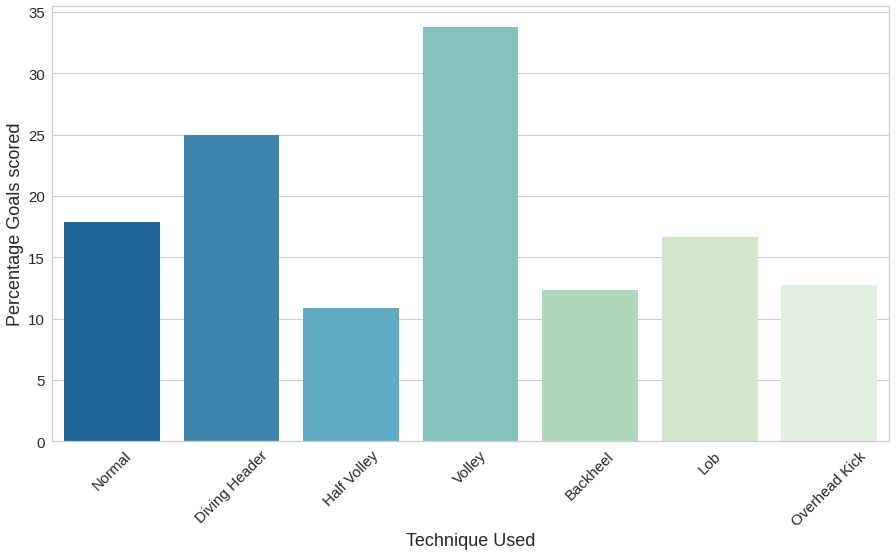

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(data=outcome,x="technique used", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(7), ("Normal", "Diving Header", "Half Volley", "Volley", "Backheel", "Lob", "Overhead Kick"),rotation=45)
plt.xlabel("Technique Used", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

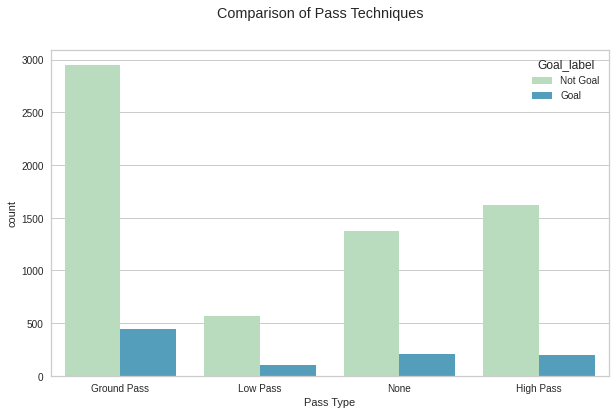

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Comparison of Pass Techniques')
sns.countplot(x='Pass Type',data=df_regular_play,hue ='Goal_label',ax=axis,palette='GnBu')

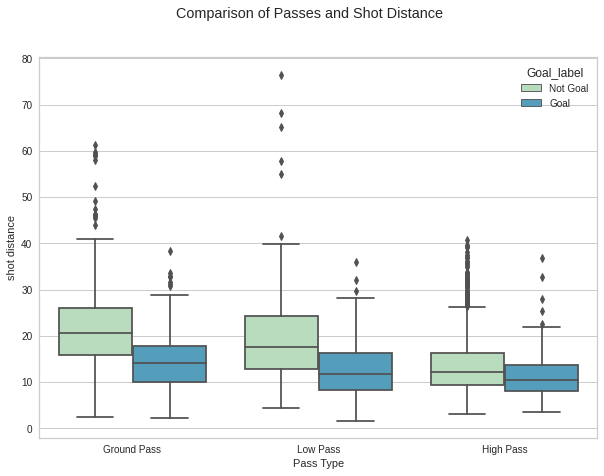

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,7))
fig.suptitle('Comparison of Passes and Shot Distance')
df_none = df_regular_play[df_regular_play['Pass Type']!='None']
sns.boxplot(x='Pass Type',y='shot distance',data=df_none,hue='Goal_label',ax=axis,palette='GnBu')

In [ ]:
pass_type = train[["Pass Type", "binary_outcome"]]
pass_type["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = pass_type.groupby("Pass Type").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


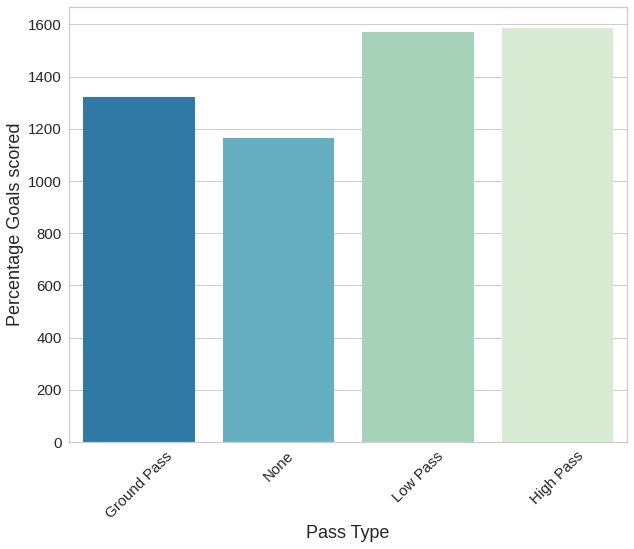

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data=outcome,x="Pass Type", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(4), ("Ground Pass", "None", "Low Pass", "High Pass"),rotation=45)
plt.xlabel("Pass Type", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

Text(0, 0.5, 'Proportion of Goals from Resulting Shots')

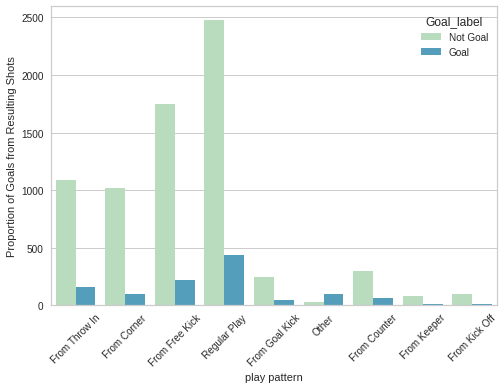

In [ ]:
sns.countplot(hue='Goal_label',x='play pattern',data=train,palette='GnBu')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Goals from Resulting Shots')

In [ ]:
train['play pattern'].value_counts()

Regular Play      2907
From Free Kick    1969
From Throw In     1247
From Corner       1119
From Counter       360
From Goal Kick     293
Other              122
From Kick Off      106
From Keeper         94
Name: play pattern, dtype: int64

In [ ]:
play_pattern = train[["play pattern", "binary_outcome"]]
play_pattern["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = play_pattern.groupby("play pattern").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


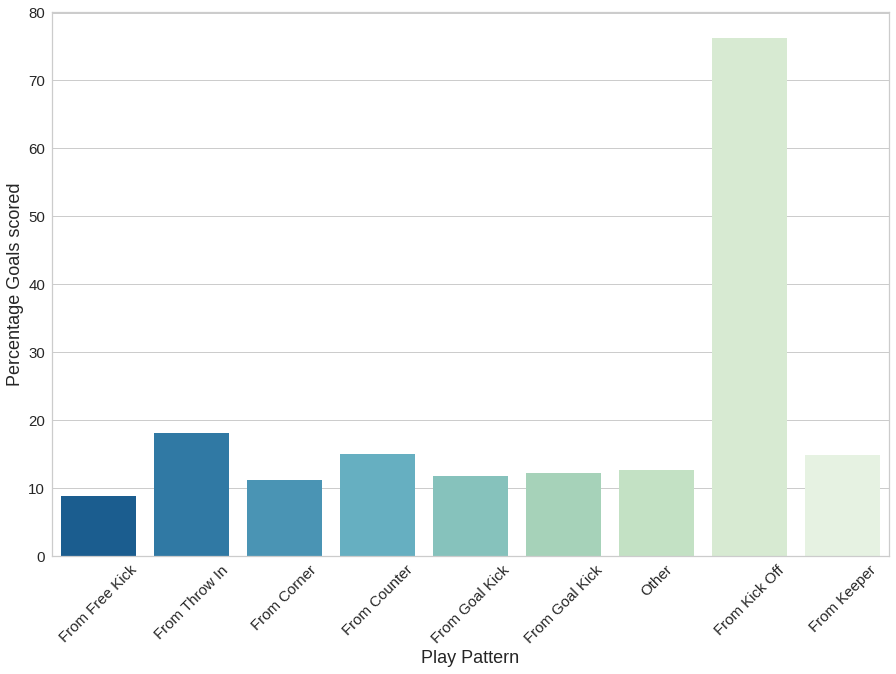

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=outcome,x="play pattern", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(9), ("From Free Kick", "From Throw In", "From Corner", "From Counter", "From Goal Kick", "From Goal Kick", "Other", "From Kick Off", "From Keeper"),rotation=45)
plt.xlabel("Play Pattern", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

In [ ]:
shot_type = train[["type of shot", "binary_outcome"]]
shot_type["binary_outcome"] = pd.to_numeric(shot_type["binary_outcome"]) * 100
outcome = shot_type.groupby("type of shot").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train['type of shot'].unique()

array(['Open Play', 'Free Kick', 'Penalty'], dtype=object)

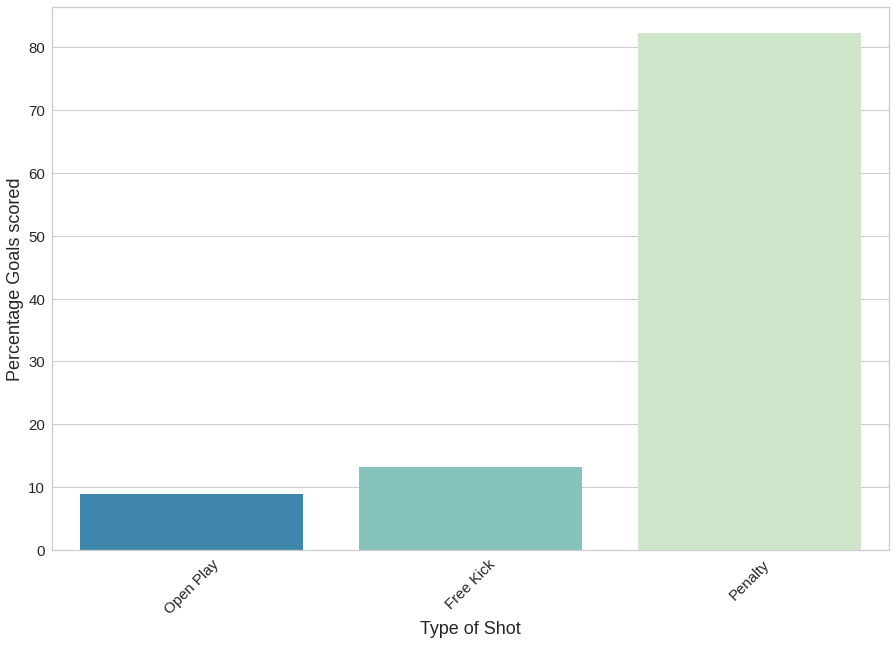

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=outcome,x="type of shot", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(3), train['type of shot'].unique(),rotation=45)
plt.xlabel("Type of Shot", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

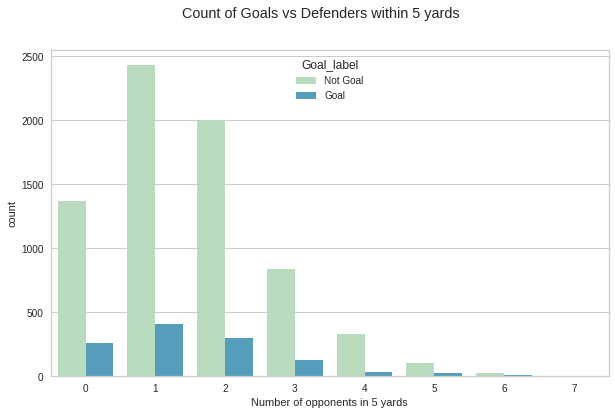

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Count of Goals vs Defenders within 5 yards')
sns.countplot(x='Number of opponents in 5 yards',data=train,hue ='Goal_label',ax=axis, palette='GnBu')

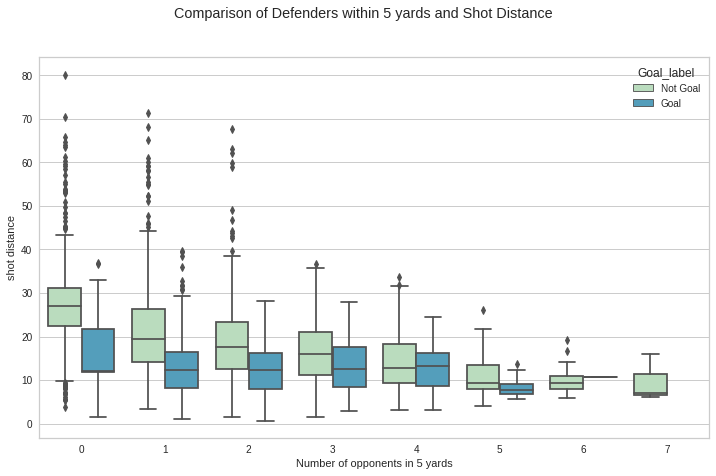

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(12,7))
fig.suptitle('Comparison of Defenders within 5 yards and Shot Distance')
df_none = df_regular_play[df_regular_play['Pass Type']!='None']
sns.boxplot(x='Number of opponents in 5 yards',y='shot distance',data=train,hue='Goal_label',ax=axis, palette='GnBu')

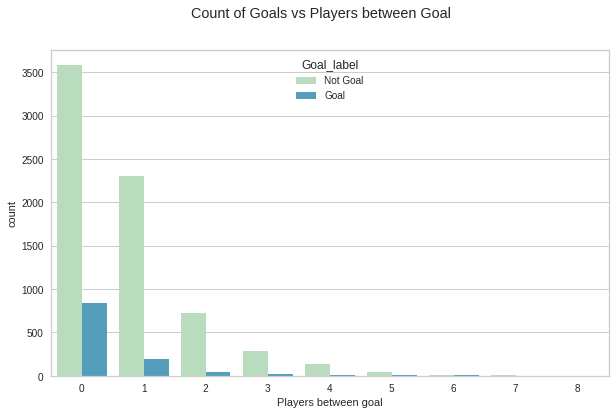

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(10,6))
fig.suptitle('Count of Goals vs Players between Goal')
sns.countplot(x='Players between goal',data=train,hue ='Goal_label',ax=axis,palette='GnBu')

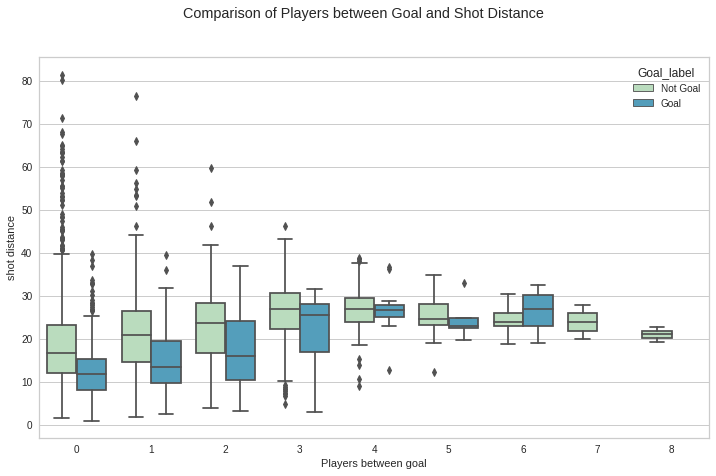

In [ ]:
fig,axis = plt.subplots(1,1, figsize=(12,7))
fig.suptitle('Comparison of Players between Goal and Shot Distance')
sns.boxplot(x='Players between goal',y='shot distance',data=train,hue='Goal_label',ax=axis,palette='GnBu')

Text(0, 0.5, 'Opponents within 5 yard ')

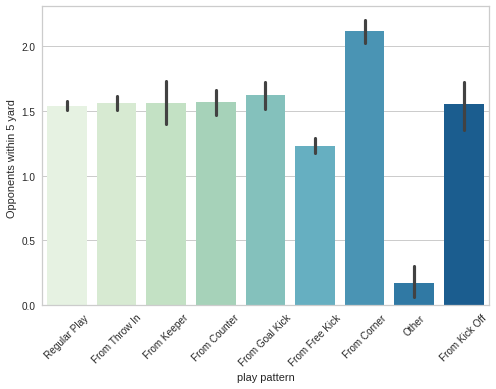

In [ ]:
sns.barplot(y='Number of opponents in 5 yards',x='play pattern',data=train,palette='GnBu')
plt.xticks(rotation=45)
plt.ylabel('Opponents within 5 yard ')

Text(0, 0.5, 'Players between goal')

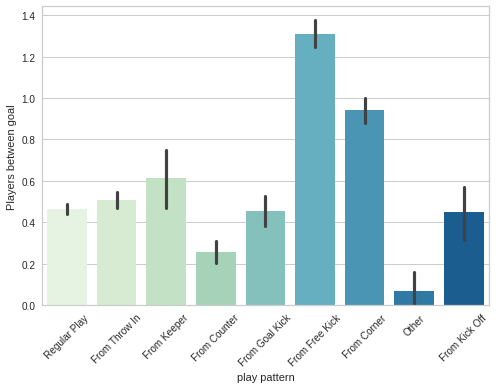

In [ ]:
sns.barplot(y='Players between goal',x='play pattern',data=train,palette='GnBu')
plt.xticks(rotation=45)
plt.ylabel('Players between goal')

As we can see that the number of players between the goal and the shot taker is the least when the play type is a counter attack.

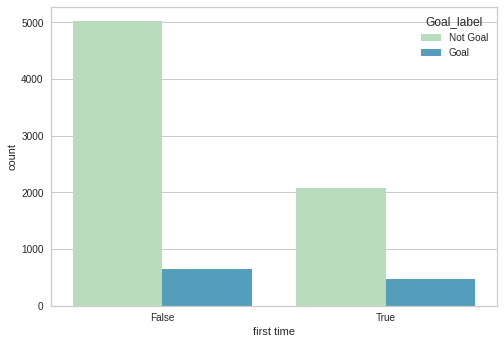

In [ ]:
sns.countplot(x='first time',data=train,palette='GnBu', hue ='Goal_label')

In [ ]:
first_time = train[["first time", "binary_outcome"]]
first_time["binary_outcome"] = pd.to_numeric(play_pattern["binary_outcome"]) * 100
outcome = first_time.groupby("first time").mean().reset_index().iloc[0:9]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


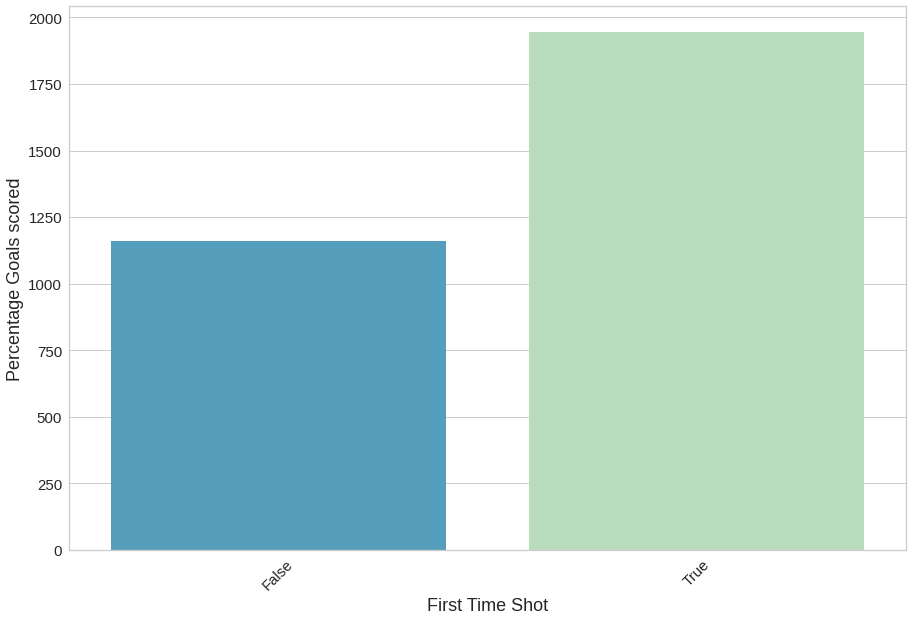

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=outcome,x="first time", y="binary_outcome", ax=ax, palette='GnBu_r')
plt.xticks(np.arange(2), ("False", "True"),rotation=45)
plt.xlabel("First Time Shot", size=18)
plt.ylabel("Percentage Goals scored", size=18)
plt.tick_params(labelsize=15)

It looks like shots taken first time result in goals on a higher rate. Let's analyze this further.

In [ ]:
train.groupby('first time', as_index=False)['shot distance'].mean()

first time  shot distance
0       False      20.217102
1        True      16.888919

Text(0, 0.5, 'Distance')

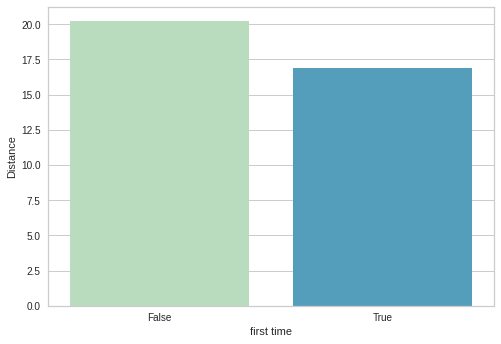

In [ ]:
sns.barplot(y='shot distance',x='first time',data=train,palette='GnBu', ci=False)
plt.ylabel('Distance')

On an average, first time goals are shot from a distance of ~17 yards, while goals that are not scored are shot from ~20 yards.

Text(0, 0.5, 'Players between goal')

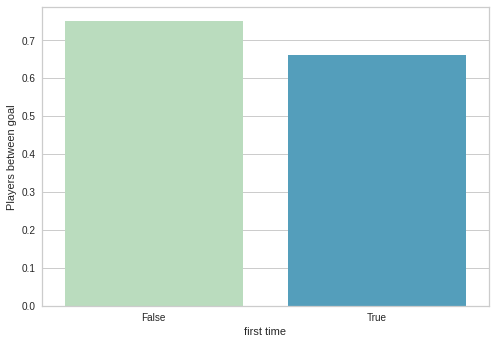

In [ ]:
sns.barplot(y='Players between goal',x='first time',data=train,palette='GnBu', ci=False)
plt.ylabel('Players between goal')

Text(0, 0.5, 'Number of opponents in 5 yards')

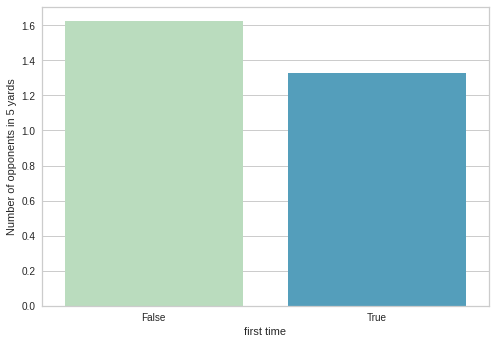

In [ ]:
sns.barplot(y='Number of opponents in 5 yards',x='first time',data=train,palette='GnBu', ci=False)
plt.ylabel('Number of opponents in 5 yards')

In [ ]:
train['official xg']

shot id
f0a124dd-eba1-4f28-a7e2-84aea7ae8d92    0.152355
dae8c46c-9ea5-48be-9827-33013a6b869f    0.017510
40c6a379-ac55-4871-8d35-60f8f830dd26    0.024789
51ac3753-f17a-42b5-8d51-37163d4f2619    0.049395
e078d128-ef8d-4824-9482-f08c32465644    0.070221
                                          ...   
49cad808-6247-4853-8afe-8c4d946b44ee    0.170945
943e1595-efe6-4b67-968c-4baea7f14c55    0.442104
67a15ce6-7672-4da1-8335-e0528d4a259f    0.069107
1036f817-3560-4ba1-b153-4ba1f1300a32    0.187142
14a93785-ad13-4b46-8f8f-7150d4798aec    0.069033
Name: official xg, Length: 8217, dtype: float64

##Let us begin with the preprocessing pipeline for Machine Learning

First we define our categorical and numerical attributes in our data. We will use the following, 
1. One Hot Encoder : For the categorical data
2. Standard Scaler : For numerical data
3. Column Transformer : To encode categorical columns and scale numerical columns

In [ ]:
cat_attributes = ['body part','Pass Type','play pattern','first time']
num_attributes = ['shot distance','shot_angle','Number of opponents in 5 yards', 'Players between goal','x location shot', 'y location shot','x gk location','y gk location']
encoder = OneHotEncoder()
scaler = StandardScaler()
transformers = [('cat',encoder,cat_attributes),('num',scaler,num_attributes)]
main_pipeline = ColumnTransformer(transformers)

In [ ]:
processed_X_train = main_pipeline.fit_transform(train)
processed_X_test = main_pipeline.transform(validate)

In [ ]:
processed_X_train

array([[ 1.        ,  0.        ,  1.        , ..., -0.73429372,
         0.4883004 ,  0.1553555 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.67469791,
         0.2801857 ,  0.3610152 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.62473367,
        -0.05279782,  0.1553555 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.04407202,
         0.57154628, -0.01602758],
       [ 0.        ,  1.        ,  0.        , ...,  0.81459779,
         0.52992334,  0.39529182],
       [ 1.        ,  0.        ,  1.        , ..., -1.08404341,
        -1.63446954, -2.89526333]])

In [ ]:
cat_transformed = main_pipeline.transformers[0][1].fit(X_train[cat_attributes], y_train).get_feature_names_out(cat_attributes)

In [ ]:
all_features_transformed = list(num_attributes) + list(cat_transformed)

In [ ]:
len(all_features_transformed)

18

In [ ]:
classifiers = {
    'catboost' : (CatBoostClassifier(),[{"learning_rate": uniform(0,0.5), "max_depth": np.arange(1,15), "n_estimators": np.arange(1, 250)}]),
    'lightgbm'      : (LGBMClassifier(),[{"max_depth" :  np.arange(1, 15),"num_leaves" :  np.arange(0, 250),"learning_rate" : uniform(0, 0.5)}]),
    'xgboost'       : (XGBClassifier(),[{"max_depth" :  np.arange(1, 15), "num_leaves" :  np.arange(0, 250), "eta" : uniform(0, 1)}]),
    'logistic regression'  : (LogisticRegression(max_iter=10000),  [{"C" : uniform(0, 20000)}])
}

In [ ]:
def hyperparameter_opt(classifier, hyperparameter_dist, processed_X_train, y_train, scoring="neg_log_loss", n_iter=20):

    print("Optimizing hyperparameters for {} model...".format(type(classifier).__name__))
    random_search = RandomizedSearchCV(estimator=classifier, param_distributions=hyperparameter_dist, cv=10, verbose=0, scoring=scoring, n_iter=n_iter)
    random_search.fit(processed_X_train, y_train)
    print("Best hyperparameters {0}".format(random_search.best_params_))
    print("Best cross validation score {0}\n".format(random_search.best_score_))

    return pd.DataFrame(random_search.cv_results_), random_search.best_estimator_

In [ ]:
random_cv_results =  {'catboost' : None,
                      'lightgbm' : None,
                      'xgboost' : None,
                      'logistic regression' : None
               }

In [ ]:
def plot_roc_curve(y,y_model_proba,y_statsbomb_proba,model_label):
    fpr,tpr,thresholds = roc_curve(y,y_model_proba[:,1]) # extracting probability for positive class
    fpr_sb,tpr_sb,thresholds_sb = roc_curve(y,y_statsbomb_proba) # statsbomb_xg values
    plt.plot(fpr,tpr,label=model_label)
    plt.plot(fpr_sb,tpr_sb,label='statsbomb')
    plt.plot([0,1],[0,1])
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');

In [ ]:
lr = LogisticRegression()
lr.fit(processed_X_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(processed_X_train)
y_train_proba = lr.predict_proba(processed_X_train)

In [ ]:
statsbomb_proba = train['official xg']

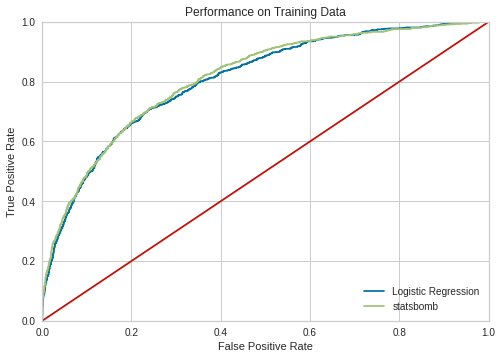

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='Logistic Regression')
plt.title('Performance on Training Data');

In [ ]:
xgb = XGBClassifier()
xgb.fit(processed_X_train,y_train)

XGBClassifier()

In [ ]:
y_train_pred = xgb.predict(processed_X_train)
y_train_proba = xgb.predict_proba(processed_X_train)

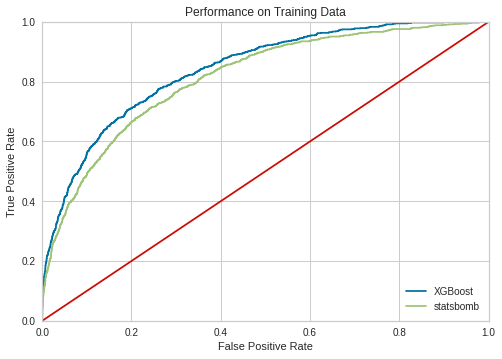

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='XGBoost')
plt.title('Performance on Training Data');

In [ ]:
print('The auc score for the XgBoost model on the training data is {}'.format(round(roc_auc_score(y_train,y_train_proba[:,1]),2)))
print('The auc score for the Statsbomb model on the training data is {}'.format(round(roc_auc_score(y_train,statsbomb_proba),2)))

The auc score for the XgBoost model on the training data is 0.84
The auc score for the Statsbomb model on the training data is 0.81


In [ ]:
X_test_preprocessed = main_pipeline.fit_transform(test)

In [ ]:
lgb = LGBMClassifier()
lgb.fit(processed_X_train,y_train)

LGBMClassifier()

In [ ]:
y_train_pred = lgb.predict(processed_X_train)
y_train_proba = lgb.predict_proba(processed_X_train)

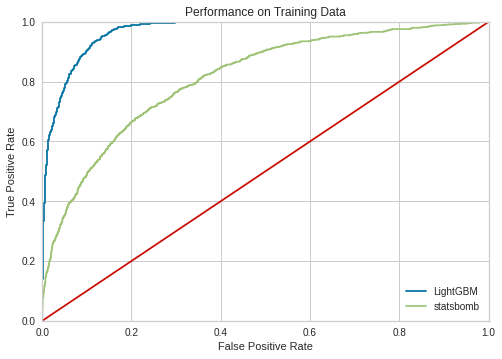

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='LightGBM')
plt.title('Performance on Training Data');

In [ ]:
print('The auc score for the LightGBM model on the training data is {}'.format(round(roc_auc_score(y_train,y_train_proba[:,1]),2)))
print('The auc score for the Statsbomb model on the training data is {}'.format(round(roc_auc_score(y_train,statsbomb_proba),2)))

The auc score for the LightGBM model on the training data is 0.97
The auc score for the Statsbomb model on the training data is 0.81


In [ ]:
cat = CatBoostClassifier()
cat.fit(processed_X_train,y_train)

Learning rate set to 0.02431
0:	learn: 0.6700430	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.6498194	total: 66.9ms	remaining: 33.4s
2:	learn: 0.6302007	total: 70.7ms	remaining: 23.5s
3:	learn: 0.6109246	total: 74.5ms	remaining: 18.6s
4:	learn: 0.5925449	total: 78.4ms	remaining: 15.6s
5:	learn: 0.5765971	total: 82.1ms	remaining: 13.6s
6:	learn: 0.5603290	total: 85.8ms	remaining: 12.2s
7:	learn: 0.5457088	total: 92.3ms	remaining: 11.4s
8:	learn: 0.5319503	total: 96.5ms	remaining: 10.6s
9:	learn: 0.5192394	total: 100ms	remaining: 9.93s
10:	learn: 0.5072911	total: 104ms	remaining: 9.36s
11:	learn: 0.4959908	total: 108ms	remaining: 8.88s
12:	learn: 0.4866215	total: 112ms	remaining: 8.48s
13:	learn: 0.4766234	total: 115ms	remaining: 8.13s
14:	learn: 0.4672112	total: 119ms	remaining: 7.83s
15:	learn: 0.4590777	total: 123ms	remaining: 7.57s
16:	learn: 0.4509641	total: 127ms	remaining: 7.34s
17:	learn: 0.4430829	total: 131ms	remaining: 7.13s
18:	learn: 0.4361413	total: 134ms	remaining: 6.94s
19:

Text(0.5, 1.0, 'Performance on Training Data')

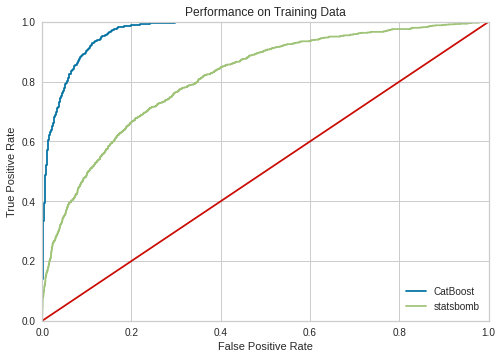

In [ ]:
plot_roc_curve(y_train,y_train_proba,statsbomb_proba,model_label='CatBoost')
plt.title('Performance on Training Data')

In [ ]:
print('The auc score for the CatBoost model on the training data is {}'.format(round(roc_auc_score(y_train,y_train_proba[:,1]),2)))
print('The auc score for the Statsbomb model on the training data is {}'.format(round(roc_auc_score(y_train,statsbomb_proba),2)))

The auc score for the CatBoost model on the training data is 0.97
The auc score for the Statsbomb model on the training data is 0.81


In [ ]:
for classifier_name, classifier_obj in classifiers.items(): 
    results = hyperparameter_opt(classifier=classifier_obj[0], 
                                 hyperparameter_dist=classifier_obj[1], 
                                 processed_X_train=processed_X_train, 
                                 y_train=y_train, 
                                 scoring="neg_log_loss",
                                 n_iter=5)
    random_cv_results[classifier_name] = results

Optimizing hyperparameters for CatBoostClassifier model...
0:	learn: 0.5726088	total: 3.36ms	remaining: 185ms
1:	learn: 0.4973098	total: 6.2ms	remaining: 168ms
2:	learn: 0.4469746	total: 8.91ms	remaining: 157ms
3:	learn: 0.4096389	total: 11.7ms	remaining: 152ms
4:	learn: 0.3839092	total: 14.4ms	remaining: 147ms
5:	learn: 0.3631412	total: 17.2ms	remaining: 143ms
6:	learn: 0.3484828	total: 19.9ms	remaining: 139ms
7:	learn: 0.3385203	total: 22.6ms	remaining: 136ms
8:	learn: 0.3290840	total: 25.4ms	remaining: 132ms
9:	learn: 0.3223359	total: 28.3ms	remaining: 130ms
10:	learn: 0.3173812	total: 31.3ms	remaining: 128ms
11:	learn: 0.3138040	total: 34ms	remaining: 125ms
12:	learn: 0.3103580	total: 36.7ms	remaining: 121ms
13:	learn: 0.3081178	total: 39.6ms	remaining: 119ms
14:	learn: 0.3065530	total: 42.3ms	remaining: 116ms
15:	learn: 0.3050461	total: 45.3ms	remaining: 113ms
16:	learn: 0.3038548	total: 48ms	remaining: 110ms
17:	learn: 0.3031660	total: 51.1ms	remaining: 108ms
18:	learn: 0.3017142

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.model_selection import validation_curve
validation_set_predictions = {'lightgbm' : None,'xgboost' : None,'logistic regression' : None, 'catboost' : None }

for classifier_name, classifier_obj in random_cv_results.items():
  try:
    classifier = random_cv_results[classifier_name][1]
    y_train_pred = classifier.predict_proba(processed_X_train)
    y_valid_pred = classifier.predict_proba(processed_X_test)

    validation_set_predictions[classifier_name] = y_valid_pred
    
    print(classifier_name)
    print("training set results: {0}".format(log_loss(y_train, y_train_pred, normalize=True)))
    print("validation set results: {0}".format(log_loss(y_valid, y_valid_pred, normalize=True)))
    
  except TypeError:
    continue

catboost
training set results: 0.2875643674845119
validation set results: 0.3365224183603498
lightgbm
training set results: 0.3049103597843114
validation set results: 0.3384312699897908
xgboost
training set results: 0.22000950631687363
validation set results: 0.34248778074732994
logistic regression
training set results: 0.30528703575811
validation set results: 0.3341319310851357


In [ ]:
ensemble_xg_model = VotingClassifier(estimators=[('lightgbm', random_cv_results["lightgbm"][1]), 
                                                 ('xgboost', random_cv_results["xgboost"][1]), 
                                                 ('catboost', random_cv_results["catboost"][1])], 
                                     voting='soft')

ensemble_xg_model.fit(processed_X_train, y_train)
y_valid_pred = ensemble_xg_model.predict_proba(processed_X_test)
print("validation set results: {0}".format(log_loss(y_valid, y_valid_pred, normalize=True)))

0:	learn: 0.5743770	total: 4.23ms	remaining: 233ms
1:	learn: 0.4980700	total: 7.24ms	remaining: 195ms
2:	learn: 0.4453302	total: 10.2ms	remaining: 180ms
3:	learn: 0.4083798	total: 13ms	remaining: 170ms
4:	learn: 0.3827724	total: 16ms	remaining: 164ms
5:	learn: 0.3622492	total: 19ms	remaining: 159ms
6:	learn: 0.3473869	total: 21.9ms	remaining: 153ms
7:	learn: 0.3366312	total: 24.7ms	remaining: 148ms
8:	learn: 0.3280711	total: 27.5ms	remaining: 144ms
9:	learn: 0.3221711	total: 30.4ms	remaining: 140ms
10:	learn: 0.3173681	total: 33.3ms	remaining: 136ms
11:	learn: 0.3136540	total: 36.2ms	remaining: 133ms
12:	learn: 0.3105955	total: 39.2ms	remaining: 130ms
13:	learn: 0.3085413	total: 45.6ms	remaining: 137ms
14:	learn: 0.3069165	total: 48.6ms	remaining: 133ms
15:	learn: 0.3057076	total: 51.6ms	remaining: 129ms
16:	learn: 0.3041951	total: 54.6ms	remaining: 125ms
17:	learn: 0.3027890	total: 57.6ms	remaining: 122ms
18:	learn: 0.3017213	total: 60.6ms	remaining: 118ms
19:	learn: 0.3007870	total: 

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
binary_xgbmodel = random_cv_results["xgboost"][1].fit(processed_full_X_train, y_train.append(y_valid))
binary_catmodel = random_cv_results["catboost"][1].fit(processed_full_X_train, y_train.append(y_valid))
binary_lgbmodel = random_cv_results["lightgbm"][1].fit(processed_full_X_train, y_train.append(y_valid))

0:	learn: 0.5738680	total: 3.93ms	remaining: 216ms
1:	learn: 0.4983413	total: 7.17ms	remaining: 194ms
2:	learn: 0.4463949	total: 10.3ms	remaining: 182ms
3:	learn: 0.4108148	total: 13.3ms	remaining: 172ms
4:	learn: 0.3859879	total: 16.5ms	remaining: 168ms
5:	learn: 0.3660034	total: 19.7ms	remaining: 164ms
6:	learn: 0.3512514	total: 22.8ms	remaining: 160ms
7:	learn: 0.3411630	total: 26ms	remaining: 156ms
8:	learn: 0.3327238	total: 29ms	remaining: 152ms
9:	learn: 0.3267267	total: 32.1ms	remaining: 147ms
10:	learn: 0.3221137	total: 35.2ms	remaining: 144ms
11:	learn: 0.3189406	total: 38.4ms	remaining: 141ms
12:	learn: 0.3159038	total: 41.5ms	remaining: 137ms
13:	learn: 0.3137079	total: 44.8ms	remaining: 134ms
14:	learn: 0.3116093	total: 48ms	remaining: 131ms
15:	learn: 0.3104412	total: 51.4ms	remaining: 128ms
16:	learn: 0.3091629	total: 54.6ms	remaining: 125ms
17:	learn: 0.3084053	total: 56.6ms	remaining: 120ms
18:	learn: 0.3072726	total: 59.9ms	remaining: 117ms
19:	learn: 0.3066604	total: 

In [ ]:
binary_lr_model = random_cv_results["logistic regression"][1].fit(processed_full_X_train, y_train.append(y_valid))

In [ ]:
X_test_preprocessed = main_pipeline.fit_transform(test)

In [ ]:
statsbomb_proba_test= test['official xg']

In [ ]:
y_test_pred = binary_lr_model.predict(X_test_preprocessed)
y_test_proba = binary_lr_model.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.83')

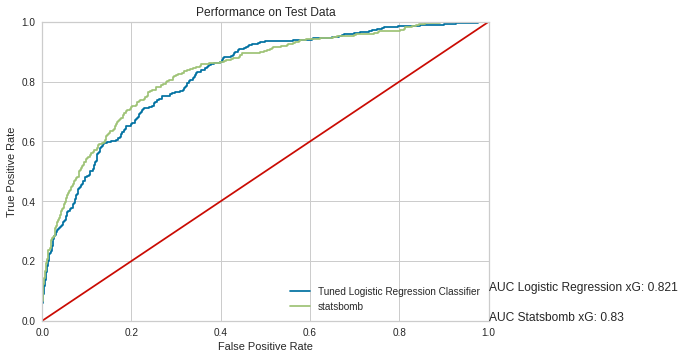

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned Logistic Regression Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC Logistic Regression xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned Logistic Regression model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
y_test_pred = binary_xgbmodel.predict(X_test_preprocessed)
y_test_proba = binary_xgbmodel.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.83')

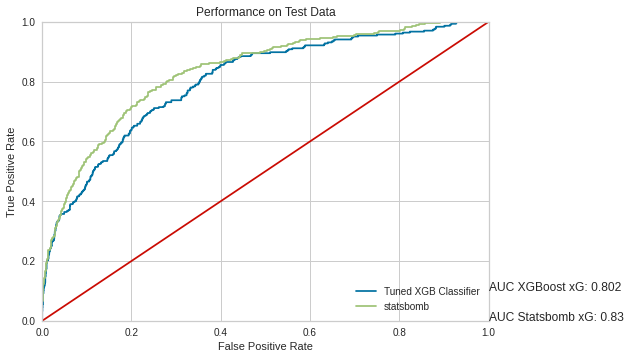

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned XGB Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC XGBoost xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned XGBoost model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
y_test_pred = binary_lgbmodel.predict(X_test_preprocessed)
y_test_proba = binary_lgbmodel.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.83')

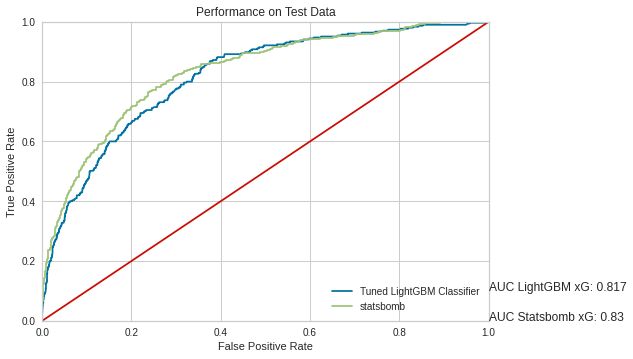

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned LightGBM Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC LightGBM xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned LightGBM model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
y_test_pred = binary_catmodel.predict(X_test_preprocessed)
y_test_proba = binary_catmodel.predict_proba(X_test_preprocessed)

Text(1, 0, 'AUC Statsbomb xG: 0.83')

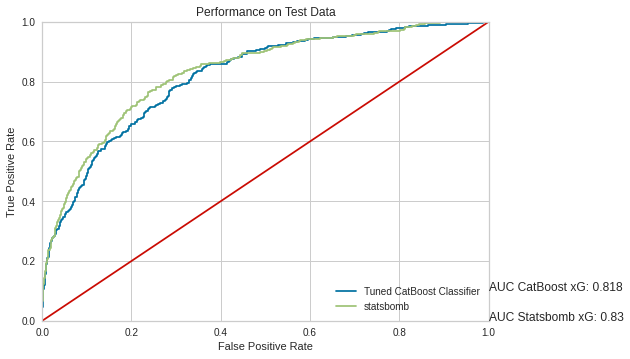

In [ ]:
plot_roc_curve(y_test,y_test_proba,statsbomb_proba_test,model_label='Tuned CatBoost Classifier')
plt.title('Performance on Test Data')
plt.annotate("AUC CatBoost xG: {}".format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)), xy = (1, 0.1), size=12)
plt.annotate("AUC Statsbomb xG: {}".format(round(roc_auc_score(y_test,statsbomb_proba_test),2)), xy = (1, 0), size=12)
#print('The auc score for the tuned CatBoost model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))
#print('The auc score for the Statsbomb model on the test data is {}'.format(round(roc_auc_score(y_test,statsbomb_proba_test),2)))

In [ ]:
logit_coefs = binary_lr_model.coef_
logit_coefs[0]

array([-9.26754372e-02, -9.13270633e-01, -1.16179609e-03, -5.58574186e-01,
       -3.39468946e-01, -1.06741141e-01, -5.27695963e-01, -4.78250107e-01,
       -5.39118876e-01, -4.66827194e-01, -1.58521988e+00,  2.92099661e-01,
       -1.20033445e-01, -2.68260495e-01, -6.14058116e-01,  1.08919827e-01,
       -4.07815918e-01, -3.26983850e-02])

In [ ]:
xgb_importances = binary_xgbmodel.feature_importances_
xgb_importances

array([0.15505451, 0.        , 0.03852722, 0.16045097, 0.03161939,
       0.03459802, 0.03590862, 0.        , 0.04408766, 0.        ,
       0.06667437, 0.13401309, 0.03692729, 0.08393238, 0.0420055 ,
       0.03531355, 0.06333286, 0.03755443], dtype=float32)

In [ ]:
lgb_importances = binary_lgbmodel.feature_importances_
lgb_importances

array([11,  0,  2,  6,  0,  0,  0,  0,  1,  0, 22, 23,  4,  7,  4,  1, 15,
        4])

In [ ]:
cat_importances = binary_catmodel.feature_importances_
cat_importances

array([ 2.40566091,  2.8824782 ,  3.20789275,  3.08776226,  1.63929311,
        0.97515932,  0.        ,  0.66929539,  0.        ,  1.23733978,
       14.84056559, 24.8480555 ,  4.13274404,  5.38840543,  8.05197025,
        5.24722777, 16.93960026,  4.44654943])

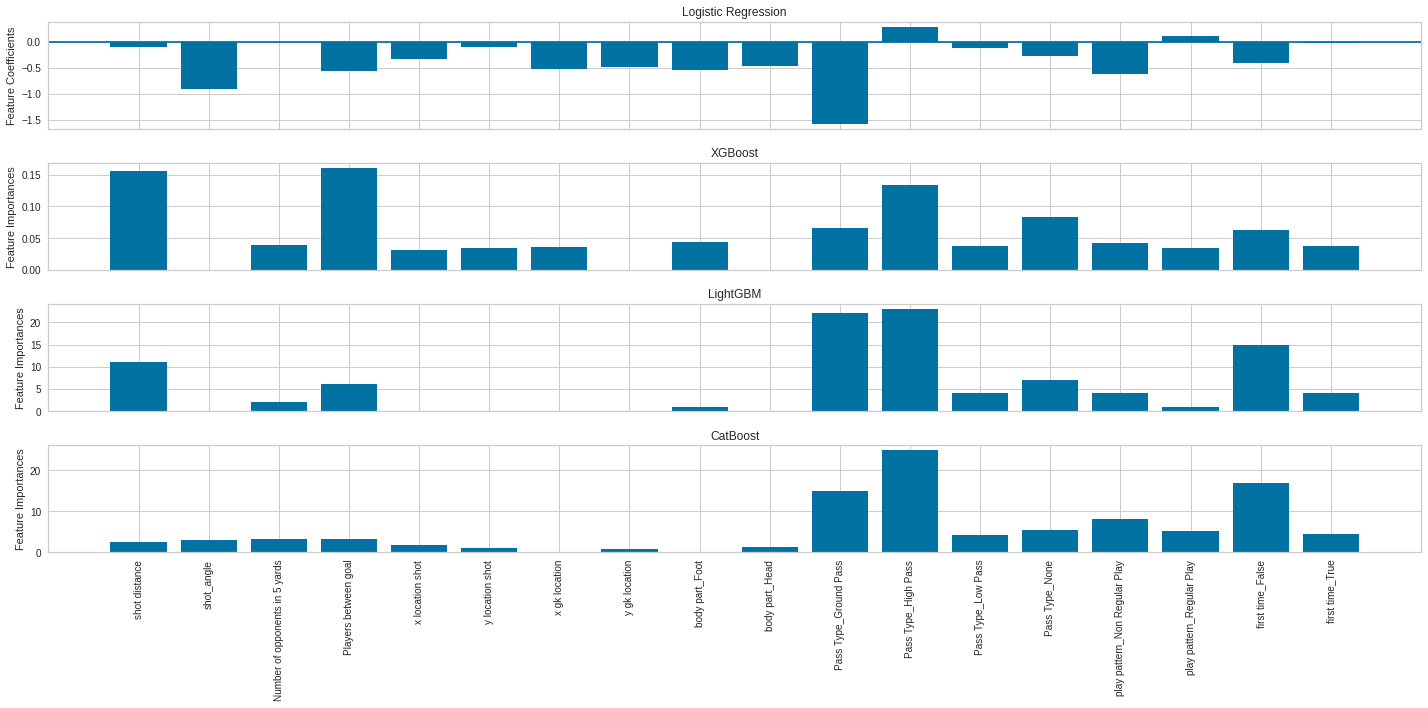

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=(20,10),sharex=True)

#logistic regression plot
ax1.bar(range(len(logit_coefs[0])),logit_coefs[0],align='center')
ax1.axhline(y=0)
ax1.set_ylabel('Feature Coefficients')
ax1.set_title('Logistic Regression')

#xgboost plot
ax2.bar(range(len(xgb_importances)),xgb_importances,align='center')
ax2.set_ylabel('Feature Importances')
ax2.set_title('XGBoost')

#gradboost plot
ax3.bar(range(len(lgb_importances)),lgb_importances,align='center')
ax3.set_ylabel('Feature Importances')
ax3.set_title('LightGBM')

ax4.bar(range(len(cat_importances)),cat_importances,align='center')
ax4.set_xticks(np.arange(0,len(xgb_importances),1))
ax4.set_xticklabels(all_features_transformed)
plt.xticks(rotation=90)
ax4.set_ylabel('Feature Importances')
ax4.set_title('CatBoost')



plt.tight_layout()

In [ ]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(processed_full_X_train, mode="classification",
                                              class_names=train['Goal_label'].unique(),
                                              feature_names=all_features_transformed,
                                             )

In [ ]:
pkl.dump(xgbmodel, open('xgbmodel.pkl', 'wb'))
pkl.dump(lgbmodel, open('lgbmodel.pkl', 'wb'))
pkl.dump(catmodel, open('catmodel.pkl', 'wb'))

NameError: ignored

In [ ]:
pickled_xgbmodel = pkl.load(open('xgbmodel.pkl', 'rb'))
pickled_lgbmodel = pkl.load(open('lgbmodel.pkl', 'rb'))
pickled_catmodel = pkl.load(open('catmodel.pkl', 'rb'))

In [ ]:
pkl.dump(binary_xgbmodel, open('binary_xgbmodel.pkl', 'wb'))
pkl.dump(binary_lgbmodel, open('binary_lgbmodel.pkl', 'wb'))
pkl.dump(binary_catmodel, open('binary_catmodel.pkl', 'wb'))

In [ ]:
pkl.dump(binary_lr_model, open('binary_lr_model.pkl', 'wb'))

In [ ]:
binary_xgbmodel = pkl.load(open('binary_xgbmodel.pkl', 'rb'))
binary_lgbmodel = pkl.load(open('binary_lgbmodel.pkl', 'rb'))
binary_catmodel = pkl.load(open('binary_catmodel.pkl', 'rb'))

In [ ]:
binary_lr_model = pkl.load(open('binary_lr_model.pkl', 'rb'))

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

test_set_predictions = {'lightgbm' : None,
                        'xgboost' : None,
                        'catboost' : None,
                        'logistic regression': None}

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_xgbmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_xgbmodel.predict_proba(X_test_preprocessed)

test_set_predictions['xgboost'] = y_test_pred
    
print('XGBoost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

XGBoost
test set results: 0.3104923096012193



In [ ]:
eli5.explain_weights_xgboost(binary_xgbmodel, feature_names = np.array(all_features_transformed), top=100)
#xgb, vec=None, top=20, target_names=None, targets=None, feature_names=None, feature_re=None, feature_filter=None, importance_type='gain')

Explanation(estimator='XGBClassifier(eta=0.11829507229401048, max_depth=6, num_leaves=184)', description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Players between goal', weight=0.16045097, std=None, value=None), FeatureWeight(feature='shot distance', weight=0.15505451, std=None, value=None), FeatureWeight(feature='Pass Type_High Pass', weight=0.13401309, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=0.083932385, std=None, value=None), FeatureWeight(feature='Pass Type_Ground Pass', weight=0.066674374, std=None, value=None), FeatureWeight(feature='first time_False', weight=0.06333286, std=None, value=None), FeatureWeight(feature='body part_Foot', weight=0.04408766, std=None, value=None), FeatureWeight(feature='play pattern_Non Regular Play', weight=0.042005498, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=0.038527217, std=None, value=None), FeatureWeight(feature='first time_True', weight=0.03755443, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=0.03692729, std=None, value=None), FeatureWeight(feature='x gk location', weight=0.035908625, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.035313547, std=None, value=None), FeatureWeight(feature='y location shot', weight=0.034598015, std=None, value=None), FeatureWeight(feature='x location shot', weight=0.03161939, std=None, value=None), FeatureWeight(feature='body part_Head', weight=0.0, std=None, value=None), FeatureWeight(feature='y gk location', weight=0.0, std=None, value=None), FeatureWeight(feature='shot_angle', weight=0.0, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

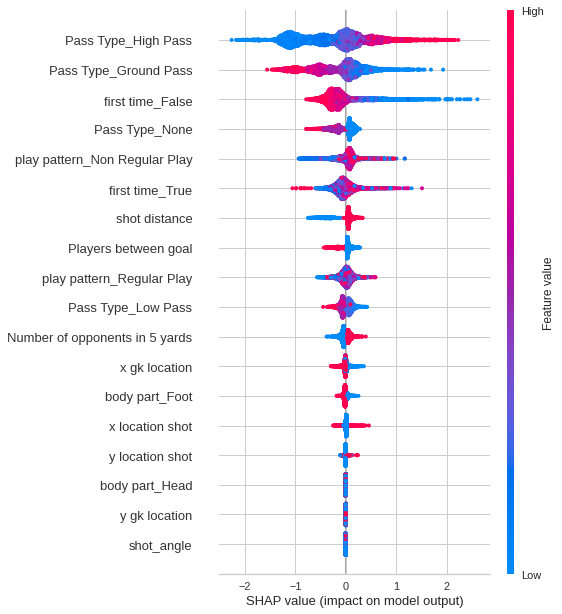

In [ ]:
explainer = shap.TreeExplainer(binary_xgbmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train["Goal_label"].unique())

Text(0, 0.5, 'XGBoost xG')

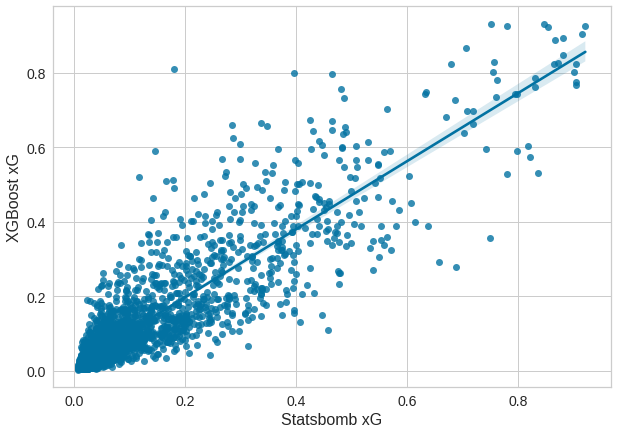

In [ ]:
shot_test_set_results = test.copy()
shot_test_set_results["xgboost xg"] = test_set_predictions["xgboost"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
#shot_test_set_results.plot("xgboost xg", "official xg", kind="scatter", ax=ax, alpha=0.25)
sns.regplot(data=shot_test_set_results,y="xgboost xg",x="official xg")
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("XGBoost xG", size=16)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_lr_model.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_lr_model.predict_proba(X_test_preprocessed)
y_test_pred_val = binary_lr_model.predict(X_test_preprocessed)
test_set_predictions['logistic regression'] = y_test_pred
    
print('Logistic Regression')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))
#print(classification_report(y_test,y_test_pred_val))
#print(confusion_matrix(y_test, y_test_pred_val))

Logistic Regression
test set results: 0.30254060806155864



Text(0, 0.5, 'Logistic Regression xG')

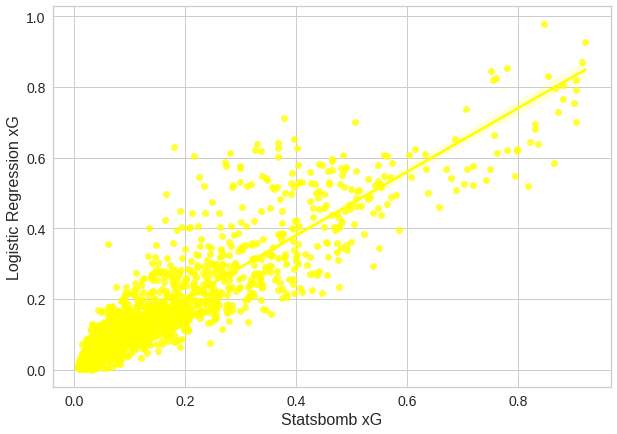

In [ ]:
shot_test_set_results["logreg xg"] = test_set_predictions["logistic regression"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
sns.regplot(data=shot_test_set_results,y="logreg xg",x="official xg", color='yellow')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("Logistic Regression xG", size=16)

In [ ]:
explainer = shap.KernelExplainer(binary_lr_model.predict_proba, processed_full_X_train)
shap_values = explainer.shap_values(X_test_preprocessed)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_preprocessed)

Using 10272 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/2569 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [ ]:
import random
idx = random.randint(1, len(X_test_preprocessed))

print("Prediction : ", binary_lr_model.predict_proba(X_test_preprocessed[idx].reshape(1,-1))[0])
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(X_test_preprocessed[idx], binary_lr_model.predict_proba,num_features=len(all_features_transformed))

explanation.show_in_notebook()

Prediction :  [0.95843715 0.04156285]
Actual :      0


AttributeError: ignored

In [ ]:
eli5.explain_weights(binary_lr_model, feature_names = np.array(all_features_transformed), top=100)

Explanation(estimator='LogisticRegression(C=10876.413417115942, max_iter=10000)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Pass Type_High Pass', weight=0.2920996612218578, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.1089198266848087, std=None, value=None)], neg=[FeatureWeight(feature='Pass Type_Ground Pass', weight=-1.5852198777096864, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-1.0059563361551764, std=None, value=None), FeatureWeight(feature='shot_angle', weight=-0.9132706326326525, std=None, value=None), FeatureWeight(feature='play pattern_Non Regular Play', weight=-0.6140581157492748, std=None, value=None), FeatureWeight(feature='Players between goal', weight=-0.5585741861600404, std=None, value=None), FeatureWeight(feature='body part_Foot', weight=-0.53911887602296, std=None, value=None), FeatureWeight(feature='x gk location', weight=-0.5276959625360428, std=None, value=None), FeatureWeight(feature='y gk location', weight=-0.47825010725525824, std=None, value=None), FeatureWeight(feature='body part_Head', weight=-0.46682719376833676, std=None, value=None), FeatureWeight(feature='first time_False', weight=-0.40781591779575443, std=None, value=None), FeatureWeight(feature='x location shot', weight=-0.33946894641313663, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=-0.26826049500011245, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=-0.1200334450889367, std=None, value=None), FeatureWeight(feature='y location shot', weight=-0.10674114112568746, std=None, value=None), FeatureWeight(feature='shot distance', weight=-0.09267543715864957, std=None, value=None), FeatureWeight(feature='first time_True', weight=-0.032698384992250355, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=-0.0011617960924359626, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_catmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_catmodel.predict_proba(X_test_preprocessed)

test_set_predictions['catboost'] = y_test_pred
    
print('CatBoost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

0:	learn: 0.5738680	total: 3.74ms	remaining: 206ms
1:	learn: 0.4983413	total: 6.94ms	remaining: 187ms
2:	learn: 0.4463949	total: 10ms	remaining: 177ms
3:	learn: 0.4108148	total: 13.2ms	remaining: 172ms
4:	learn: 0.3859879	total: 16.4ms	remaining: 168ms
5:	learn: 0.3660034	total: 19.7ms	remaining: 164ms
6:	learn: 0.3512514	total: 22.7ms	remaining: 159ms
7:	learn: 0.3411630	total: 25.9ms	remaining: 155ms
8:	learn: 0.3327238	total: 29ms	remaining: 151ms
9:	learn: 0.3267267	total: 32ms	remaining: 147ms
10:	learn: 0.3221137	total: 35.2ms	remaining: 144ms
11:	learn: 0.3189406	total: 38.3ms	remaining: 140ms
12:	learn: 0.3159038	total: 41.4ms	remaining: 137ms
13:	learn: 0.3137079	total: 44.8ms	remaining: 134ms
14:	learn: 0.3116093	total: 47.9ms	remaining: 131ms
15:	learn: 0.3104412	total: 51ms	remaining: 127ms
16:	learn: 0.3091629	total: 54.2ms	remaining: 124ms
17:	learn: 0.3084053	total: 56.2ms	remaining: 119ms
18:	learn: 0.3072726	total: 59.3ms	remaining: 115ms
19:	learn: 0.3066604	total: 62

In [ ]:
eli5.explain_weights_catboost(binary_catmodel, feature_names = np.array(all_features_transformed), top=100)

Explanation(estimator='<catboost.core.CatBoostClassifier object at 0x7f5a670c4f90>', description='CatBoost feature importances; \nvalues are numbers 0 <= x <= 1; all values sum to 1.', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Pass Type_High Pass', weight=0.24848057, std=None, value=None), FeatureWeight(feature='first time_False', weight=0.16939601, std=None, value=None), FeatureWeight(feature='Pass Type_Ground Pass', weight=0.14840567, std=None, value=None), FeatureWeight(feature='play pattern_Non Regular Play', weight=0.08051971, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=0.05388406, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.052472282, std=None, value=None), FeatureWeight(feature='first time_True', weight=0.044465497, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=0.041327443, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=0.03207893, std=None, value=None), FeatureWeight(feature='Players between goal', weight=0.030877626, std=None, value=None), FeatureWeight(feature='shot_angle', weight=0.028824784, std=None, value=None), FeatureWeight(feature='shot distance', weight=0.02405661, std=None, value=None), FeatureWeight(feature='x location shot', weight=0.016392931, std=None, value=None), FeatureWeight(feature='body part_Head', weight=0.012373398, std=None, value=None), FeatureWeight(feature='y location shot', weight=0.009751595, std=None, value=None), FeatureWeight(feature='y gk location', weight=0.0066929543, std=None, value=None), FeatureWeight(feature='x gk location', weight=0.0, std=None, value=None), FeatureWeight(feature='body part_Foot', weight=0.0, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

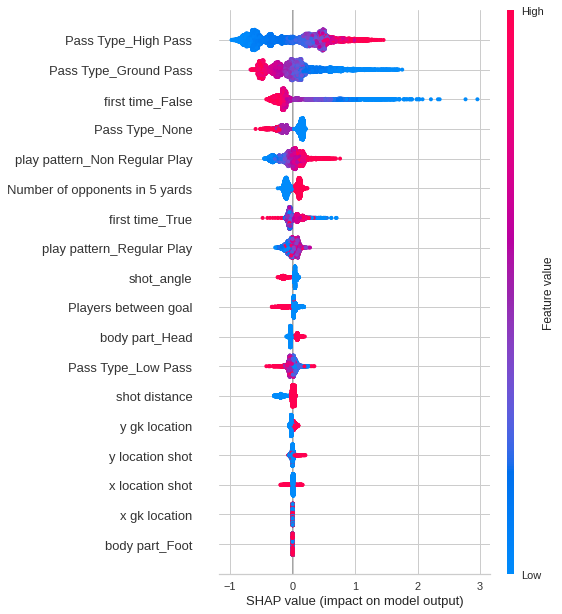

In [ ]:
explainer = shap.TreeExplainer(binary_catmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train["Goal_label"].unique())

Text(0, 0.5, 'Catboost xG')

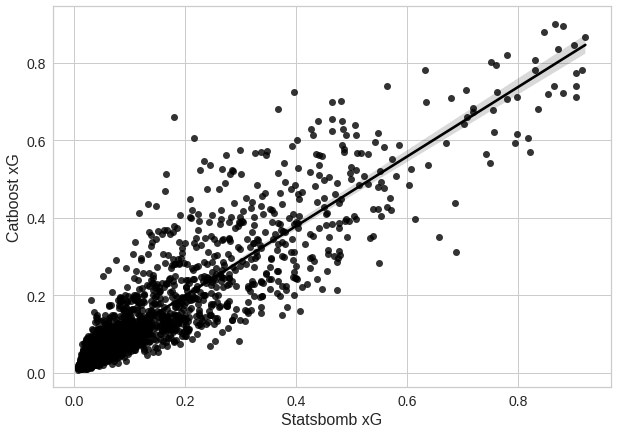

In [ ]:
shot_test_set_results["catboost xg"] = test_set_predictions["catboost"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
#shot_test_set_results.plot("official xg", "catboost xg", color = "black",kind="scatter", ax=ax, alpha=0.25)
sns.regplot(data=shot_test_set_results,y="catboost xg",x="official xg", color='black')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("Catboost xG", size=16)

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)


#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
binary_lgbmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = binary_lgbmodel.predict_proba(X_test_preprocessed)

test_set_predictions['lightgbm'] = y_test_pred
    
print('Light Gradient Boost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

Light Gradient Boost
test set results: 0.30763579435802185



In [ ]:
eli5.explain_weights_lightgbm(binary_lgbmodel, feature_names = np.array(all_features_transformed), top=100)

Explanation(estimator='LGBMClassifier(learning_rate=0.12925288931645623, max_depth=1, num_leaves=11)', description='\nLightGBM feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Pass Type_High Pass', weight=0.37526993574914586, std=None, value=None), FeatureWeight(feature='Pass Type_Ground Pass', weight=0.26960214727698156, std=None, value=None), FeatureWeight(feature='first time_False', weight=0.201062542278859, std=None, value=None), FeatureWeight(feature='shot distance', weight=0.05129631692145992, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=0.04295978077876052, std=None, value=None), FeatureWeight(feature='Players between goal', weight=0.02433446133308294, std=None, value=None), FeatureWeight(feature='body part_Foot', weight=0.012395571013655151, std=None, value=None), FeatureWeight(feature='play pattern_Non Regular Play', weight=0.007351100336904663, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=0.006013039304457767, std=None, value=None), FeatureWeight(feature='first time_True', weight=0.0056847649528018185, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=0.002738897169697326, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.0012914428841934952, std=None, value=None), FeatureWeight(feature='body part_Head', weight=0.0, std=None, value=None), FeatureWeight(feature='y gk location', weight=0.0, std=None, value=None), FeatureWeight(feature='x gk location', weight=0.0, std=None, value=None), FeatureWeight(feature='y location shot', weight=0.0, std=None, value=None), FeatureWeight(feature='x location shot', weight=0.0, std=None, value=None), FeatureWeight(feature='shot_angle', weight=0.0, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


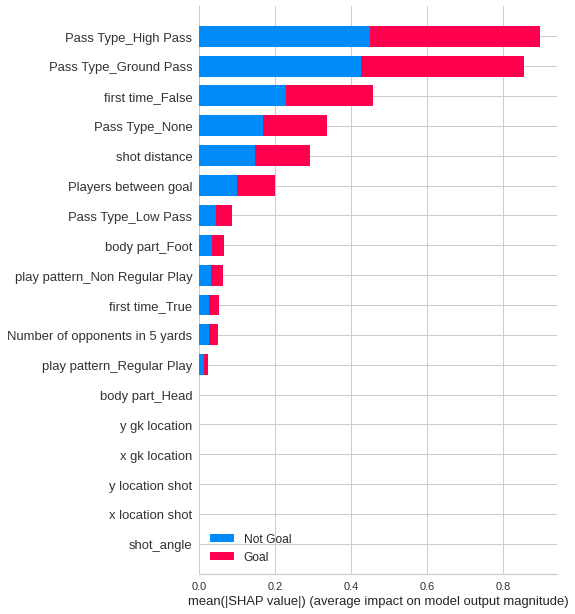

In [ ]:
explainer = shap.TreeExplainer(binary_lgbmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train["Goal_label"].unique())

Text(0, 0.5, 'LightGBM xG')

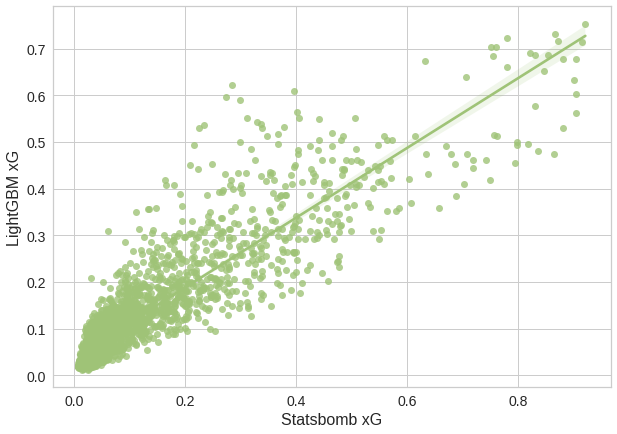

In [ ]:
shot_test_set_results["lightgbm xg"] = test_set_predictions["lightgbm"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
sns.regplot(data=shot_test_set_results,y="lightgbm xg",x="official xg", color='g')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("LightGBM xG", size=16)

In [ ]:
def freeze_frame1(game_json, shot_id,ax=ax):
    pitchplot()
    goalkeeper_x = 120
    goalkeeper_y = 40
    player_list_x = []
    player_list_y = []
    player_name = []
    team_name = []
    location_of_shot_x = 0
    location_of_shot_y = 0
    shot_end_location_x = 0
    shot_end_location_y = 0
    teammate_x = []
    teammate_y = []
    
    for events in game_json:
        if events['id'] == shot_id:
            location_of_shot_x = events['location'][0]
            location_of_shot_y = events['location'][1]
            shot_end_location_x = events['shot']['end_location'][0]
            shot_end_location_y = events['shot']['end_location'][1]

            if "freeze_frame" in events["shot"]:
                for players in events['shot']['freeze_frame']:
                    if (players['teammate'] == False):
                        player_list_x.append(players['location'][0])
                        player_list_y.append(players['location'][1])
                        player_name.append(events['player']['name'])
                        team_name.append(events['possession_team'])
                    elif (players['teammate'] == True):
                        teammate_x.append(players['location'][0])
                        teammate_y.append(players['location'][1])
                        
                    if ((players['position']['name'] == 'Goalkeeper') and (players['teammate'] == False)):
                        goalkeeper_x = players['location'][0]
                        goalkeeper_y = players['location'][1]
          
    plt.scatter(player_list_x, player_list_y, color = 'black')
    plt.scatter(teammate_x, teammate_y, color = 'brown')
    plt.scatter(location_of_shot_x, location_of_shot_y, s=200)
    plt.scatter(goalkeeper_x, goalkeeper_y, s=100, color='red')
    plt.scatter(shot_end_location_x, shot_end_location_y, s=100, color='green')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,36], color = 'red', linestyle = 'dashed')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,44], color = 'red', linestyle = 'dashed')
    plt.title(player_name[0], fontsize = 30)
    return plt

In [ ]:
def freeze_frame2(game_json, shot_id,ax=ax):
    halfpitchplot()
    goalkeeper_x = 120
    goalkeeper_y = 40
    player_list_x = []
    player_list_y = []
    player_name = []
    team_name = []
    location_of_shot_x = 0
    location_of_shot_y = 0
    shot_end_location_x = 0
    shot_end_location_y = 0
    teammate_x = []
    teammate_y = []
    
    for events in game_json:
        if events['id'] == shot_id:
            location_of_shot_x = events['location'][0]
            location_of_shot_y = events['location'][1]
            shot_end_location_x = events['shot']['end_location'][0]
            shot_end_location_y = events['shot']['end_location'][1]

            if "freeze_frame" in events["shot"]:
                for players in events['shot']['freeze_frame']:
                    if (players['teammate'] == False):
                        player_list_x.append(players['location'][0])
                        player_list_y.append(players['location'][1])
                        player_name.append(events['player']['name'])
                        team_name.append(events['possession_team'])
                    elif (players['teammate'] == True):
                        teammate_x.append(players['location'][0])
                        teammate_y.append(players['location'][1])
                        
                    if ((players['position']['name'] == 'Goalkeeper') and (players['teammate'] == False)):
                        goalkeeper_x = players['location'][0]
                        goalkeeper_y = players['location'][1]
          
    plt.scatter(player_list_x, player_list_y, color = 'black')
    plt.scatter(teammate_x, teammate_y, color = 'brown')
    plt.scatter(location_of_shot_x, location_of_shot_y, s=200)
    plt.scatter(goalkeeper_x, goalkeeper_y, s=100, color='red')
    plt.scatter(shot_end_location_x, shot_end_location_y, s=100, color='green')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,36], color = 'red', linestyle = 'dashed')
    plt.plot([location_of_shot_x, 120], [location_of_shot_y,44], color = 'red', linestyle = 'dashed')
    plt.title(player_name[0], fontsize = 30)
    return plt

In [ ]:
predicted_xg=0.25*shot_test_set_results['xgboost xg']+0.25*shot_test_set_results['lightgbm xg']+0.25*shot_test_set_results['logreg xg']+(1-0.75)*shot_test_set_results['catboost xg']

In [ ]:
shot_test_set_results['predicted xg'] = predicted_xg

In [ ]:
shot_test_set_results.columns

Index(['play pattern', 'x location shot', 'y location shot', 'duration',
       'outcome', 'technique used', 'first time', 'x gk location',
       'y gk location', 'body part', 'type of shot',
       'Number of opponents in 5 yards', 'Players between goal', 'player name',
       'Team Name', 'official xg', 'Pass id', 'Pass Type', 'game_id',
       'season_id', 'distance_from_goalpost_a', 'distance_from_goalpost_b',
       'shot_angle', 'shot distance', 'gk distance', 'Goal_label',
       'binary_outcome', 'xgboost xg', 'logreg xg', 'catboost xg',
       'lightgbm xg', 'predicted xg'],
      dtype='object')

In [ ]:
df_player_level = shot_test_set_results[['player name','binary_outcome','predicted xg']]
df_player_level=df_player_level.groupby(['player name']).sum()
df_player_level['xG_Diff']=df_player_level['binary_outcome']-df_player_level['predicted xg']

df_player_level_xG=df_player_level.sort_values(by=['xG_Diff'],ascending=False)
df_player_level_xG=df_player_level_xG.round(1)
df_player_level_xG.columns=['goals','xG_sum','xG_Diff']
df_player_level_xG.head(10)

goals  xG_sum  xG_Diff
player name                                             
Lionel Andrés Messi Cuccittini       67    58.6      8.4
Luis Alberto Suárez Díaz             29    22.8      6.2
Neymar da Silva Santos Junior        12     8.2      3.8
Jordi Alba Ramos                      5     3.3      1.7
Zlatan Ibrahimović                    4     2.4      1.6
Cristhian Ricardo Stuani Curbelo      2     0.5      1.5
Ivan Rakitić                          6     4.6      1.4
Bojan Krkíc Pérez                     5     3.6      1.4
Aleix Vidal Parreu                    2     0.6      1.4
Pedro Eliezer Rodríguez Ledesma      13    11.7      1.3

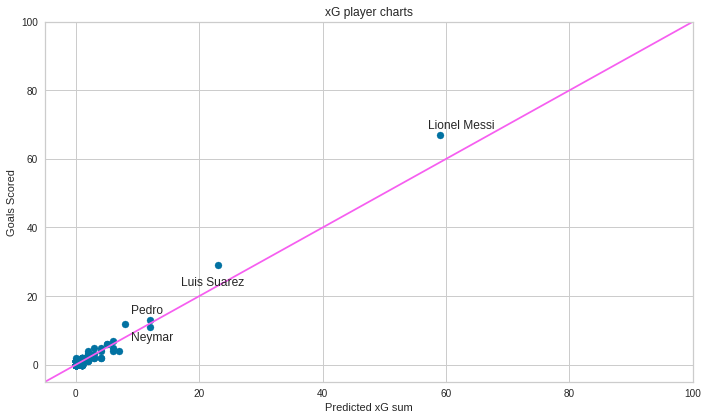

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(round(df_player_level_xG['xG_sum'],0),df_player_level_xG['goals'])
plt.plot([-5,100],[-5,100],color="#f65ef0")
plt.xlabel('Predicted xG sum')
plt.ylabel('Goals Scored')
plt.xlim([-5,100])
plt.ylim([-5,100])
plt.annotate('Lionel Messi',xy=(57,69),xytext=(57,69))
plt.annotate('Luis Suarez',xy=(17,23),xytext=(17,23))
plt.annotate('Pedro',xy=(9,15),xytext=(9,15))
plt.annotate('Neymar',xy=(9,7),xytext=(9,7))
plt.title('xG player charts')
plt.tight_layout()
plt.savefig('xg_player_charts.png')

In [ ]:
match_level_xg = shot_test_set_results[['x location shot','y location shot','Team Name','player name','binary_outcome','predicted xg']]

In [ ]:
season_xg=match_level_xg[['player name','binary_outcome','predicted xg','Team Name']].groupby('Team Name').sum()

season_xg = season_xg.round(1)
season_xg['xgDiff']=season_xg['binary_outcome']-season_xg['predicted xg']
season_xg.columns=['Goals','Cumulative xG','xgDiff']
season_xg=season_xg.sort_values(by='Cumulative xG',ascending=False).iloc[0:19]
season_xg['Actual League Position'] = [1,4,9,6,3,10,8,2,5,7,11,16,18,12,19,13,14,15,17]
season_xg

Goals  Cumulative xG  xgDiff  Actual League Position
Team Name                                                                
Barcelona              223          214.5     8.5                       1
Sevilla                  5            7.6    -2.6                       4
Real Madrid              7            7.4    -0.4                       9
Valencia                11            7.2     3.8                       6
Atlético Madrid          4            4.9    -0.9                       3
Villarreal               5            4.9     0.1                      10
Real Betis               7            4.7     2.3                       8
Getafe                   4            4.3    -0.3                       2
Athletic Club            3            4.1    -1.1                       5
Celta Vigo               4            4.0     0.0                       7
Real Sociedad            3            3.8    -0.8                      11
Espanyol                 1            3.8    -2.8                      16
Eibar                    2            3.0    -1.0                      18
Real Zaragoza            5            2.7     2.3                      12
Osasuna                  3            2.7     0.3                      19
Levante                  0            2.3    -2.3                      13
Deportivo La Coruna      2            2.2    -0.2                      14
Málaga                   2            1.9     0.1                      15
Girona                   3            1.9     1.1                      17

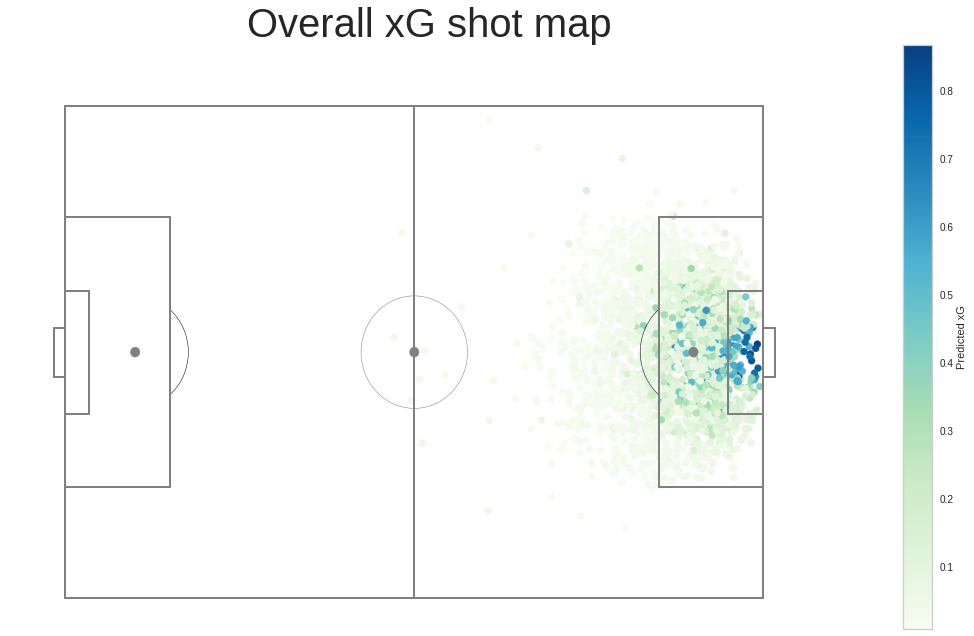

In [ ]:
plt1 = pitchplot()
plt1 = plt.scatter(shot_test_set_results['x location shot'],shot_test_set_results['y location shot'],c=shot_test_set_results['predicted xg'],cmap='GnBu')
plt.axis('off')
cbar=plt.colorbar()
cbar.set_label('Predicted xG')
plt.title('Overall xG shot map',size=40)
plt.tight_layout()
plt.savefig('overallxGmap.png')

In [ ]:
from matplotlib.patches import Arc

In [ ]:
set(shot_test_set_results['Team Name'].values)

{'Albacete',
 'Almería',
 'Athletic Club',
 'Atlético Madrid',
 'Barcelona',
 'Celta Vigo',
 'Cádiz',
 'Córdoba',
 'Deportivo Alavés',
 'Deportivo La Coruna',
 'Eibar',
 'Elche',
 'Espanyol',
 'Getafe',
 'Girona',
 'Granada',
 'Huesca',
 'Hércules',
 'Las Palmas',
 'Leganés',
 'Levante',
 'Mallorca',
 'Málaga',
 'Numancia',
 'Osasuna',
 'Racing Santander',
 'Rayo Vallecano',
 'Real Betis',
 'Real Madrid',
 'Real Murcia',
 'Real Sociedad',
 'Real Valladolid',
 'Real Zaragoza',
 'Recreativo Huelva',
 'Sevilla',
 'Sporting Gijón',
 'Tenerife',
 'Valencia',
 'Villarreal',
 'Xerez'}

In [ ]:
for team in set(shot_test_set_results['Team Name'].values):
      if team=='Barcelona' or team=='Atlético Madrid' or team=='Real Madrid' or team== 'Sevilla':
        print(team)

Atlético Madrid
Sevilla
Real Madrid
Barcelona


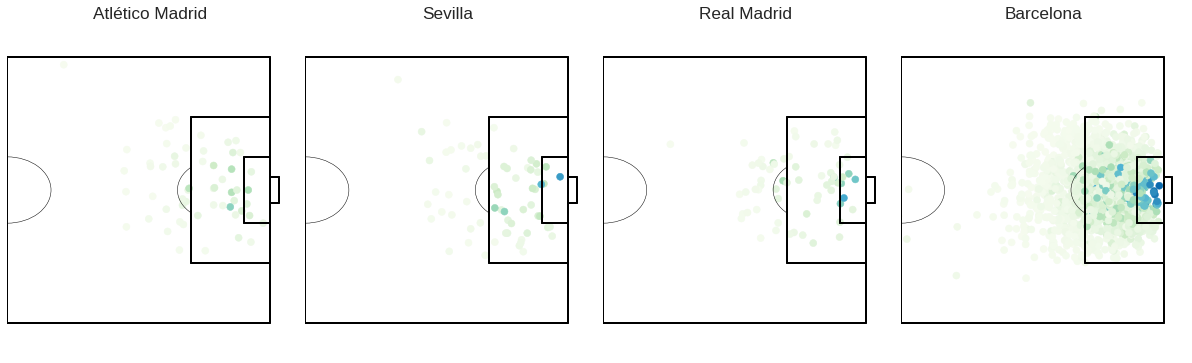

In [ ]:
i=1
fig=plt.figure(figsize=(25,10))
with plt.style.context('bmh'):
    for team in set(shot_test_set_results['Team Name'].values):
      if team=='Barcelona' or team=='Atlético Madrid' or team=='Real Madrid' or team== 'Sevilla':
        filt1 = shot_test_set_results['Team Name'] == team
        df_team = shot_test_set_results[filt1]

        ax = fig.add_subplot(2,6,i)

        ax.axis([60, 125, -10, 90])
        ax.grid(False)


        ax.plot([60, 60], [0, 80], color='black')
        ax.plot([120, 120], [0, 80], color="black")
        ax.plot([60, 120], [0, 0], color='black')
        ax.plot([60, 120], [80, 80], color='black')

        centreCircle = plt.Circle((60, 40), 10, color='black', fill=False)

        # right penalty area
        ax.plot([120, 102], [18, 18], color='black')
        ax.plot([102, 102], [18, 62], color='black')
        ax.plot([102, 120], [62, 62], color='black')

        # right six yard box
        ax.plot([120, 114], [30, 30], color='black')
        ax.plot([114, 114], [30, 50], color='black')
        ax.plot([114, 120], [50, 50], color='black')


        # right goal posts
        ax.plot([120, 122], [36, 36], color='black')
        ax.plot([120, 122], [44, 44], color='black')
        ax.plot([122, 122], [36, 44], color='black')


        # right Arc
        rightArc = Arc((108, 40), height=18.3, width=18.3, angle=0,
                       theta1=130, theta2=230, color='black')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])


        ax.scatter(df_team['x location shot'],df_team['y location shot'],c=df_team['predicted xg'],cmap='GnBu',vmin=0,vmax=1)
        ax.axis('off')

        ax.set_title(team)
        i+=1

plt.tight_layout()
plt.savefig('xg_allteams.png')

Text(1, 50, 'Statsbomb xG: 0.530')

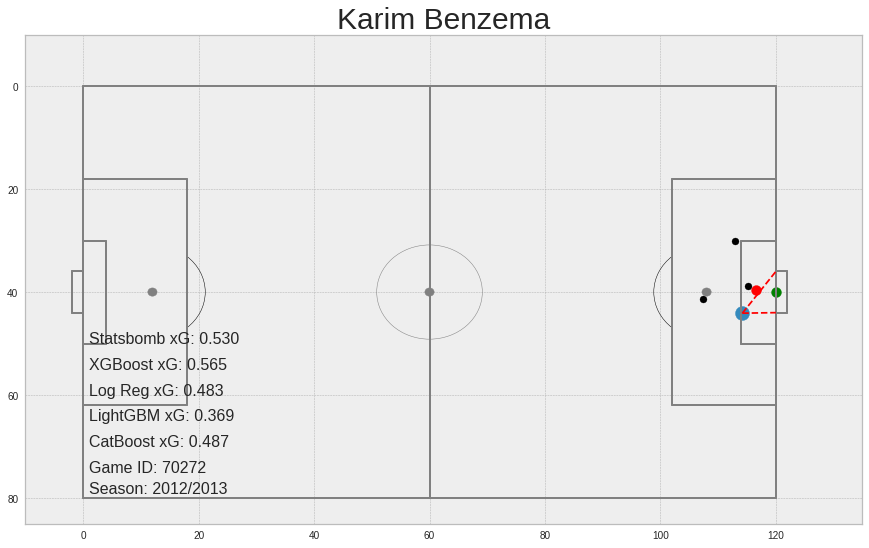

In [ ]:
ascending=False
season_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_lr = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["logreg xg"]
xg_vals_sb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["official xg"]

freeze_frame1(laliga[season_ids[70]][game_ids[70]].json_file, shot_ids[70],ax=ax)

plt.annotate("Season: {}".format(season_ids[70]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[70]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[70], 3)), xy = (1, 55), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[70], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[70], 3)), xy = (1, 65), size=16)
plt.annotate("Log Reg xG: {:.3f}".format(round(xg_vals_lr[70], 3)), xy = (1, 60), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[70], 3)), xy = (1, 50), size=16)

Text(1, 50, 'Statsbomb xG: 0.042')

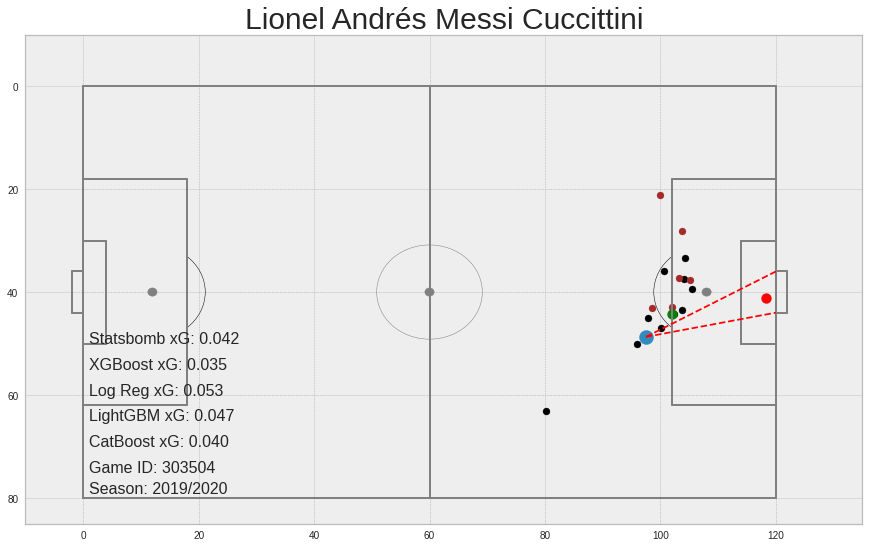

In [ ]:
ascending=False
messi_xg = shot_test_set_results[shot_test_set_results['player name']=='Lionel Andrés Messi Cuccittini']
season_ids = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_sb = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["official xg"]
xg_vals_lr = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["logreg xg"]
#messi_xg = messi_xg.sort_values("season_id", ascending=ascending).reset_index().iloc[0:100]["player name"]=="Lionel Andrés Messi Cuccittini"
freeze_frame1(laliga[season_ids[50]][game_ids[50]].json_file, shot_ids[50],ax=ax)

plt.annotate("Season: {}".format(season_ids[50]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[50]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[50], 3)), xy = (1, 55), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[50], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[50], 3)), xy = (1, 65), size=16)
plt.annotate("Log Reg xG: {:.3f}".format(round(xg_vals_lr[50], 3)), xy = (1, 60), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[50], 3)), xy = (1, 50), size=16)

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

test_set_predictions = {'lightgbm' : None,
                        'xgboost' : None,
                        'catboost' : None}

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
pickled_xgbmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = pickled_xgbmodel.predict_proba(X_test_preprocessed)

test_set_predictions['xgboost'] = y_test_pred
    
print('XGBoost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))


NameError: ignored

In [ ]:
eli5.explain_weights(pickled_xgbmodel, feature_names = np.array(all_features_transformed), top=100)

Explanation(estimator="XGBClassifier(eta=0.7100413756426096, max_depth=2, missing=nan, num_leaves=99,\n              objective='multi:softprob')", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='technique used_Half Volley', weight=0.20447013, std=None, value=None), FeatureWeight(feature='shot distance', weight=0.107300565, std=None, value=None), FeatureWeight(feature='technique used_Backheel', weight=0.09362641, std=None, value=None), FeatureWeight(feature='y location shot', weight=0.0753436, std=None, value=None), FeatureWeight(feature='first time_True', weight=0.056877207, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=0.054233458, std=None, value=None), FeatureWeight(feature='technique used_Overhead Kick', weight=0.038025822, std=None, value=None), FeatureWeight(feature='play pattern_Other', weight=0.03788155, std=None, value=None), FeatureWeight(feature='play pattern_From Counter', weight=0.029310329, std=None, value=None), FeatureWeight(feature='body part_Head', weight=0.025506278, std=None, value=None), FeatureWeight(feature='technique used_Diving Header', weight=0.024976416, std=None, value=None), FeatureWeight(feature='play pattern_From Corner', weight=0.024819426, std=None, value=None), FeatureWeight(feature='shot_angle', weight=0.021144584, std=None, value=None), FeatureWeight(feature='x location shot', weight=0.020924805, std=None, value=None), FeatureWeight(feature='play pattern_From Goal Kick', weight=0.019562831, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.018627575, std=None, value=None), FeatureWeight(feature='play pattern_From Throw In', weight=0.018538494, std=None, value=None), FeatureWeight(feature='y gk location', weight=0.01753201, std=None, value=None), FeatureWeight(feature='first time_False', weight=0.016794797, std=None, value=None), FeatureWeight(feature='technique used_Lob', weight=0.014414276, std=None, value=None), FeatureWeight(feature='Pass Type_High Pass', weight=0.013083157, std=None, value=None), FeatureWeight(feature='play pattern_From Kick Off', weight=0.011910227, std=None, value=None), FeatureWeight(feature='technique used_Normal', weight=0.0116869, std=None, value=None), FeatureWeight(feature='technique used_Volley', weight=0.010900767, std=None, value=None), FeatureWeight(feature='body part_Right Foot', weight=0.010773644, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=0.00991968, std=None, value=None), FeatureWeight(feature='body part_Other', weight=0.006509887, std=None, value=None), FeatureWeight(feature='body part_Left Foot', weight=0.0053052306, std=None, value=None), FeatureWeight(feature='play pattern_From Keeper', weight=0.0, std=None, value=None), FeatureWeight(feature='x gk location', weight=0.0, std=None, value=None), FeatureWeight(feature='Pass Type_Ground Pass', weight=0.0, std=None, value=None), FeatureWeight(feature='Players between goal', weight=0.0, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=0.0, std=None, value=None), FeatureWeight(feature='play pattern_From Free Kick', weight=0.0, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

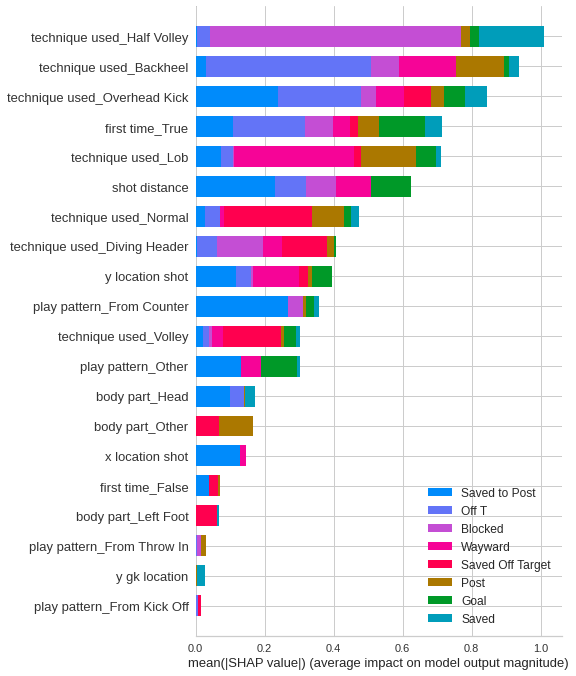

In [ ]:
#lgb = random_cv_results["lightgbm"][1]
explainer = shap.TreeExplainer(pickled_xgbmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train.outcome.unique(), plot_type="bar")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'XGBoost xG')

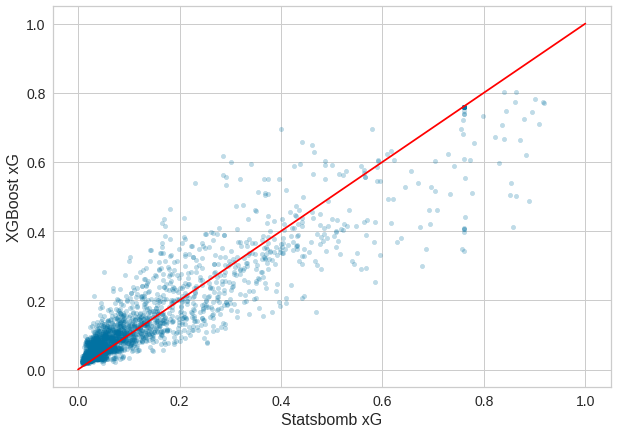

In [ ]:
shot_test_set_results = test.copy()
shot_test_set_results["xgboost xg"] = test_set_predictions["xgboost"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
shot_test_set_results.plot("official xg", "xgboost xg", kind="scatter", ax=ax, alpha=0.25)
plt.plot([0, 1], [0, 1], color='red')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("XGBoost xG", size=16)

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)

#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
pickled_catmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = pickled_catmodel.predict_proba(X_test_preprocessed)

test_set_predictions['catboost'] = y_test_pred
    
print('CatBoost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

0:	learn: 1.9698816	total: 11.3ms	remaining: 1.8s
1:	learn: 1.8739251	total: 18.7ms	remaining: 1.48s
2:	learn: 1.8025109	total: 26ms	remaining: 1.36s
3:	learn: 1.7472779	total: 33.5ms	remaining: 1.31s
4:	learn: 1.7016391	total: 40.9ms	remaining: 1.27s
5:	learn: 1.6643908	total: 48.5ms	remaining: 1.24s
6:	learn: 1.6341547	total: 55.7ms	remaining: 1.22s
7:	learn: 1.6078532	total: 63.4ms	remaining: 1.2s
8:	learn: 1.5866896	total: 70.8ms	remaining: 1.19s
9:	learn: 1.5681149	total: 78.6ms	remaining: 1.18s
10:	learn: 1.5519742	total: 86.1ms	remaining: 1.17s
11:	learn: 1.5380509	total: 93.6ms	remaining: 1.15s
12:	learn: 1.5265636	total: 102ms	remaining: 1.15s
13:	learn: 1.5156433	total: 109ms	remaining: 1.14s
14:	learn: 1.5063074	total: 118ms	remaining: 1.14s
15:	learn: 1.4986278	total: 125ms	remaining: 1.13s
16:	learn: 1.4908262	total: 133ms	remaining: 1.12s
17:	learn: 1.4840531	total: 141ms	remaining: 1.11s
18:	learn: 1.4780732	total: 151ms	remaining: 1.12s
19:	learn: 1.4735042	total: 159ms

Text(0, 0.5, 'Catboost xG')

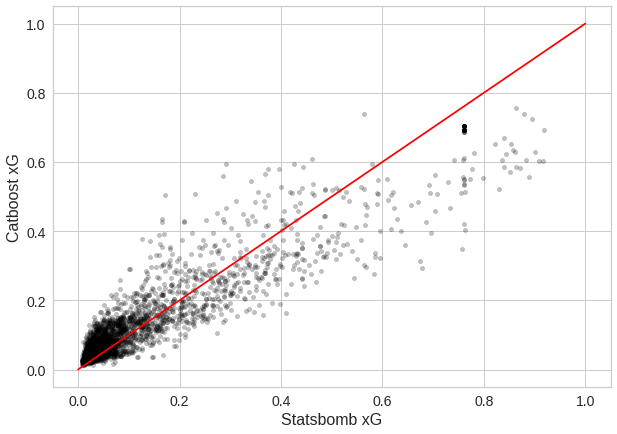

In [ ]:
shot_test_set_results["catboost xg"] = test_set_predictions["catboost"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
shot_test_set_results.plot("official xg", "catboost xg", color = "black",kind="scatter", ax=ax, alpha=0.25)
plt.plot([0, 1], [0, 1], color='red')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("Catboost xG", size=16)

In [ ]:
eli5.explain_weights(pickled_catmodel, feature_names = np.array(all_features_transformed), top=100)

Explanation(estimator='<catboost.core.CatBoostClassifier object at 0x7f0ead1dce90>', description='CatBoost feature importances; \nvalues are numbers 0 <= x <= 1; all values sum to 1.', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='technique used_Half Volley', weight=0.25517035, std=None, value=None), FeatureWeight(feature='first time_True', weight=0.18032722, std=None, value=None), FeatureWeight(feature='technique used_Backheel', weight=0.10984459, std=None, value=None), FeatureWeight(feature='technique used_Lob', weight=0.09867689, std=None, value=None), FeatureWeight(feature='shot distance', weight=0.07774611, std=None, value=None), FeatureWeight(feature='technique used_Overhead Kick', weight=0.07682968, std=None, value=None), FeatureWeight(feature='play pattern_Other', weight=0.054573976, std=None, value=None), FeatureWeight(feature='y location shot', weight=0.052611817, std=None, value=None), FeatureWeight(feature='technique used_Diving Header', weight=0.035190634, std=None, value=None), FeatureWeight(feature='body part_Head', weight=0.013481659, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=0.012072879, std=None, value=None), FeatureWeight(feature='play pattern_From Counter', weight=0.011085941, std=None, value=None), FeatureWeight(feature='technique used_Normal', weight=0.009132846, std=None, value=None), FeatureWeight(feature='technique used_Volley', weight=0.005593204, std=None, value=None), FeatureWeight(feature='play pattern_From Free Kick', weight=0.0031911903, std=None, value=None), FeatureWeight(feature='first time_False', weight=0.0031648618, std=None, value=None), FeatureWeight(feature='y gk location', weight=0.0013062322, std=None, value=None), FeatureWeight(feature='play pattern_From Goal Kick', weight=0.0, std=None, value=None), FeatureWeight(feature='shot_angle', weight=0.0, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=0.0, std=None, value=None), FeatureWeight(feature='Players between goal', weight=0.0, std=None, value=None), FeatureWeight(feature='x location shot', weight=0.0, std=None, value=None), FeatureWeight(feature='x gk location', weight=0.0, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.0, std=None, value=None), FeatureWeight(feature='body part_Left Foot', weight=0.0, std=None, value=None), FeatureWeight(feature='body part_Other', weight=0.0, std=None, value=None), FeatureWeight(feature='body part_Right Foot', weight=0.0, std=None, value=None), FeatureWeight(feature='Pass Type_Ground Pass', weight=0.0, std=None, value=None), FeatureWeight(feature='Pass Type_High Pass', weight=0.0, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=0.0, std=None, value=None), FeatureWeight(feature='play pattern_From Throw In', weight=0.0, std=None, value=None), FeatureWeight(feature='play pattern_From Kick Off', weight=0.0, std=None, value=None), FeatureWeight(feature='play pattern_From Keeper', weight=0.0, std=None, value=None), FeatureWeight(feature='play pattern_From Corner', weight=0.0, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
train.outcome.unique()

array(['Saved', 'Goal', 'Off T', 'Blocked', 'Post', 'Wayward',
       'Saved to Post', 'Saved Off Target'], dtype=object)

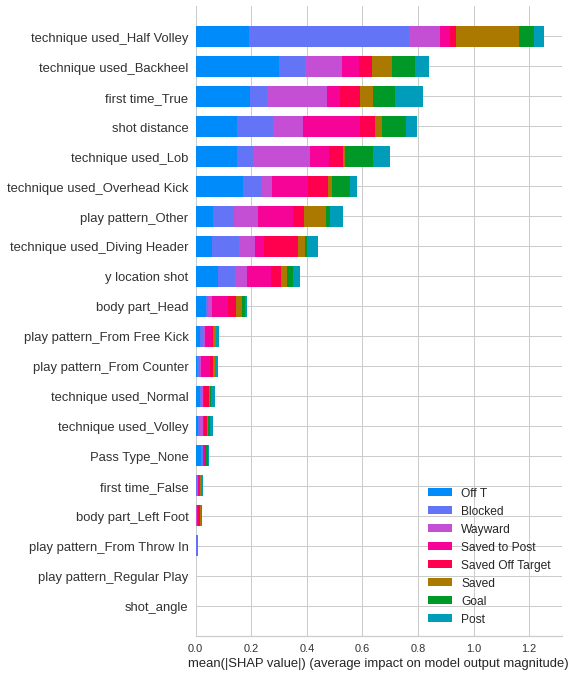

In [ ]:
#lgb = random_cv_results["lightgbm"][1]
explainer = shap.TreeExplainer(pickled_catmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train.outcome.unique(),  plot_type="bar")

In [ ]:
processed_full_X_train = np.concatenate((processed_X_train, processed_X_test), axis=0)
y_train_full = y_train.append(y_valid)


#for classifier_name, classifier_obj in random_cv_results.items():
 # try:
#classifier = random_cv_results[classifier_name][1]
pickled_lgbmodel.fit(processed_full_X_train, y_train.append(y_valid))
y_test_pred = pickled_lgbmodel.predict_proba(X_test_preprocessed)

test_set_predictions['lightgbm'] = y_test_pred
    
print('Light Gradient Boost')
print("test set results: {0}\n".format(log_loss(y_test, y_test_pred, normalize=True)))

Light Gradient Boost
test set results: 1.8368120049865018



Text(0, 0.5, 'LightGBM xG')

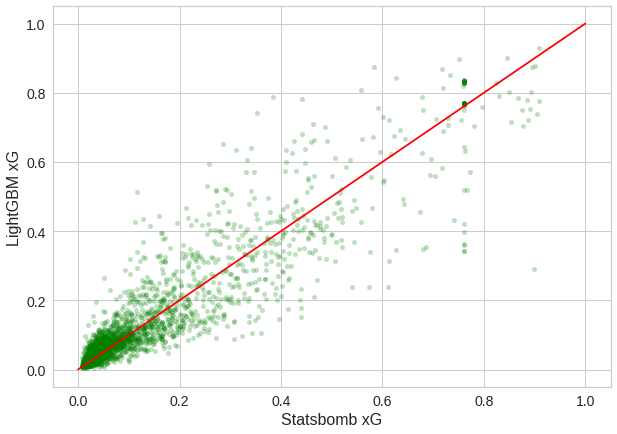

In [ ]:
shot_test_set_results["lightgbm xg"] = test_set_predictions["lightgbm"][:, 1]
fig, ax = plt.subplots(1,1, figsize=[10,7])
shot_test_set_results.plot("official xg", "lightgbm xg", color = "green",kind="scatter", ax=ax, alpha=0.25)
plt.plot([0, 1], [0, 1], color='red')
plt.tick_params(labelsize=14)
plt.xlabel("Statsbomb xG", size=16)
plt.ylabel("LightGBM xG", size=16)

In [ ]:
eli5.explain_weights(pickled_lgbmodel, feature_names = np.array(all_features_transformed), top=100)

Explanation(estimator='LGBMClassifier(learning_rate=0.11857872186865781, max_depth=8, num_leaves=10)', description='\nLightGBM feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='technique used_Half Volley', weight=0.1826664524018141, std=None, value=None), FeatureWeight(feature='technique used_Backheel', weight=0.17437285430007085, std=None, value=None), FeatureWeight(feature='technique used_Overhead Kick', weight=0.1158977172608871, std=None, value=None), FeatureWeight(feature='first time_True', weight=0.11517979048751203, std=None, value=None), FeatureWeight(feature='technique used_Volley', weight=0.07002149242124348, std=None, value=None), FeatureWeight(feature='technique used_Lob', weight=0.06465839770023495, std=None, value=None), FeatureWeight(feature='technique used_Normal', weight=0.06459698348226003, std=None, value=None), FeatureWeight(feature='shot distance', weight=0.04804335564278466, std=None, value=None), FeatureWeight(feature='y location shot', weight=0.03137631263057146, std=None, value=None), FeatureWeight(feature='technique used_Diving Header', weight=0.02771266542593068, std=None, value=None), FeatureWeight(feature='play pattern_Other', weight=0.023226768777495767, std=None, value=None), FeatureWeight(feature='play pattern_From Counter', weight=0.013767930923505386, std=None, value=None), FeatureWeight(feature='body part_Head', weight=0.010042420964687514, std=None, value=None), FeatureWeight(feature='x location shot', weight=0.00834669572847279, std=None, value=None), FeatureWeight(feature='first time_False', weight=0.006119319033237985, std=None, value=None), FeatureWeight(feature='shot_angle', weight=0.005008802881490741, std=None, value=None), FeatureWeight(feature='y gk location', weight=0.004682838033800719, std=None, value=None), FeatureWeight(feature='body part_Other', weight=0.00435351744870222, std=None, value=None), FeatureWeight(feature='Players between goal', weight=0.004267301315811782, std=None, value=None), FeatureWeight(feature='play pattern_From Corner', weight=0.0037041547053574837, std=None, value=None), FeatureWeight(feature='body part_Left Foot', weight=0.0032683430450287736, std=None, value=None), FeatureWeight(feature='play pattern_From Throw In', weight=0.003213275187471282, std=None, value=None), FeatureWeight(feature='Pass Type_Low Pass', weight=0.00308191781303998, std=None, value=None), FeatureWeight(feature='play pattern_From Kick Off', weight=0.0026173960701874706, std=None, value=None), FeatureWeight(feature='x gk location', weight=0.0017329889435587777, std=None, value=None), FeatureWeight(feature='Pass Type_High Pass', weight=0.0016295409349556056, std=None, value=None), FeatureWeight(feature='play pattern_Regular Play', weight=0.0014846926764000312, std=None, value=None), FeatureWeight(feature='body part_Right Foot', weight=0.0012310139303152272, std=None, value=None), FeatureWeight(feature='play pattern_From Goal Kick', weight=0.0010410477610895712, std=None, value=None), FeatureWeight(feature='Pass Type_Ground Pass', weight=0.0008325956158754438, std=None, value=None), FeatureWeight(feature='Pass Type_None', weight=0.0006348809711637004, std=None, value=None), FeatureWeight(feature='Number of opponents in 5 yards', weight=0.0006283553249592118, std=None, value=None), FeatureWeight(feature='play pattern_From Keeper', weight=0.00044316187296888974, std=None, value=None), FeatureWeight(feature='play pattern_From Free Kick', weight=0.00011501828711420417, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

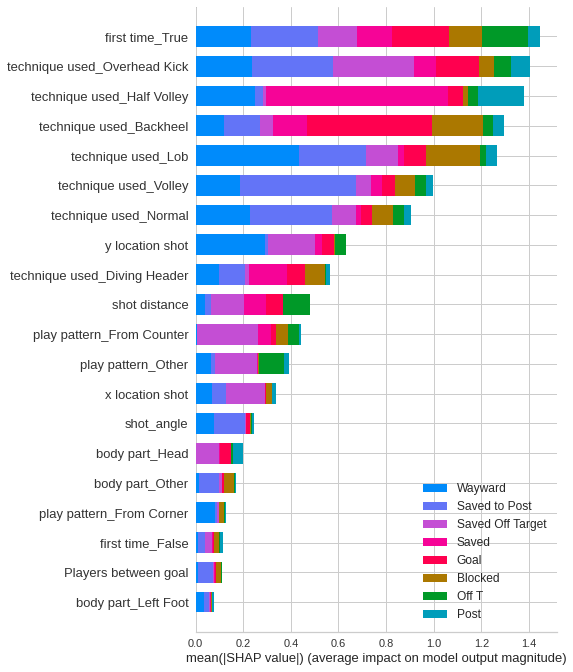

In [ ]:
explainer = shap.TreeExplainer(pickled_lgbmodel)
shap_values = explainer.shap_values(processed_X_train)
shap.summary_plot(shap_values, processed_X_train, feature_names = all_features_transformed, class_names = train.outcome.unique(), plot_type="bar")

Text(1, 50, 'Statsbomb xG: 0.008')

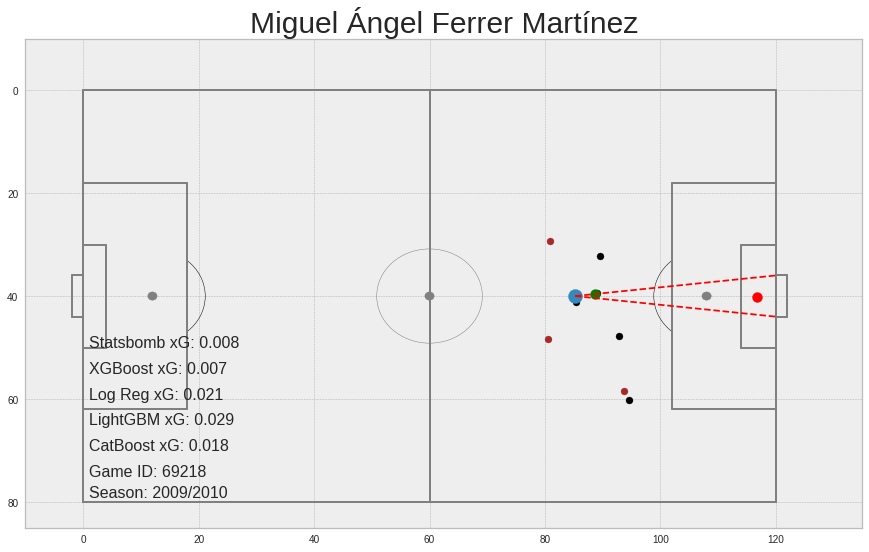

In [ ]:
ascending=True
season_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_lr = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["logreg xg"]
xg_vals_sb = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["official xg"]

freeze_frame1(laliga[season_ids[55]][game_ids[55]].json_file, shot_ids[55],ax=ax)

plt.annotate("Season: {}".format(season_ids[55]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[55]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[55], 3)), xy = (1, 55), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[55], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[55], 3)), xy = (1, 65), size=16)
plt.annotate("Log Reg xG: {:.3f}".format(round(xg_vals_lr[55], 3)), xy = (1, 60), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[55], 3)), xy = (1, 50), size=16)

(50.0, 125.0, 90.0, -10.0)

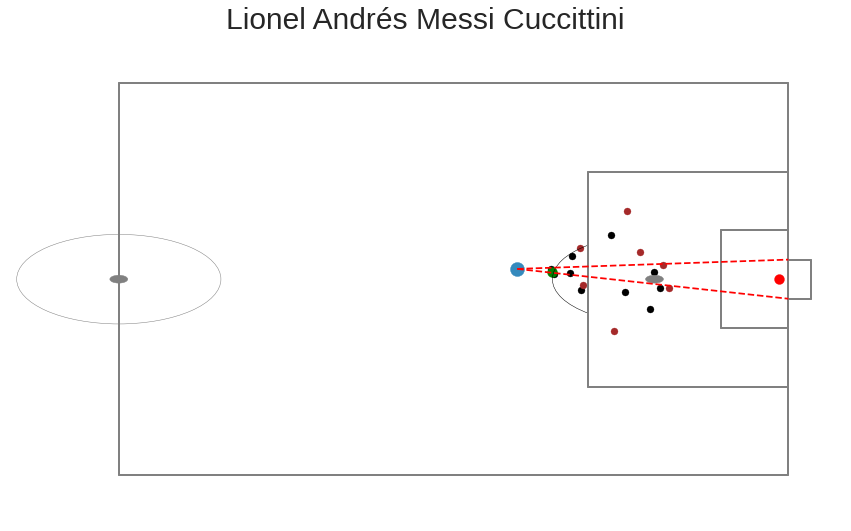

In [ ]:
ascending=True
season_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index().iloc[0:100]["shot id"]

freeze_frame2(laliga[season_ids[44]][game_ids[44]].json_file, shot_ids[44],ax=ax)
plt.axis('off')

Text(1, 55, 'Statsbomb xG: 0.009')

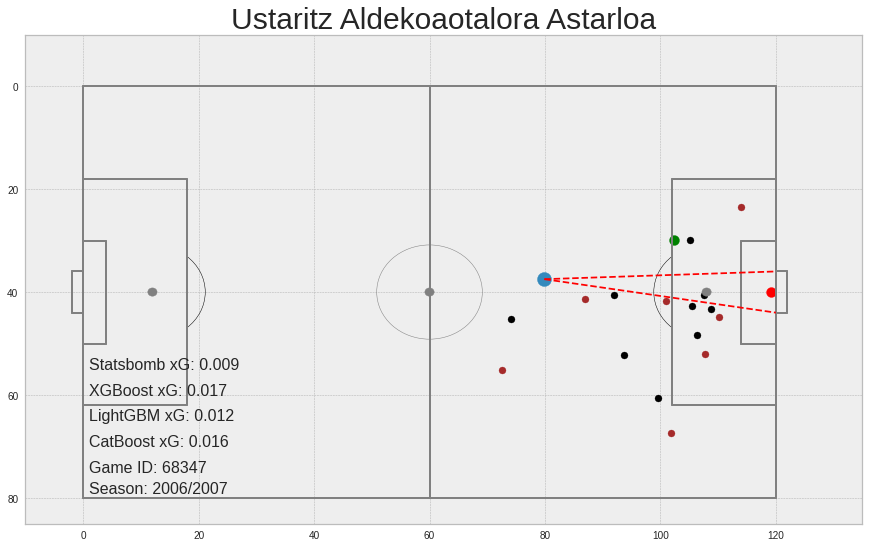

In [ ]:
ascending=False
season_ids = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["season_id"]
game_ids = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["game_id"]
shot_ids = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["shot id"]
xg_vals_xgb = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["xgboost xg"]
xg_vals_cat = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["catboost xg"]
xg_vals_lgb = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["lightgbm xg"]
xg_vals_sb = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["official xg"]
outcomeval = shot_test_set_results.sort_values("shot distance", ascending=ascending).reset_index().iloc[0:100]["outcome"]

freeze_frame1(laliga[season_ids[25]][game_ids[25]].json_file, shot_ids[25],ax=ax)

plt.annotate("Season: {}".format(season_ids[25]), xy = (1,79), size=16)
plt.annotate("Game ID: {}".format(game_ids[25]), xy = (1,75), size=16)
plt.annotate("XGBoost xG: {:.3f}".format(round(xg_vals_xgb[25], 3)), xy = (1, 60), size=16)
plt.annotate("CatBoost xG: {:.3f}".format(round(xg_vals_cat[25], 3)), xy = (1, 70), size=16)
plt.annotate("LightGBM xG: {:.3f}".format(round(xg_vals_lgb[25], 3)), xy = (1, 65), size=16)
plt.annotate("Statsbomb xG: {:.3f}".format(round(xg_vals_sb[25], 3)), xy = (1, 55), size=16)

In [ ]:
def xGgoals(fig,df):    
    halfpitchplot()
    sns.scatterplot(data=df, x="x location shot", y="y location shot", hue="Goal_label", size = 'xgboost xg',sizes=(20, 200), palette='GnBu')
    #px.density_heatmap(df_regular_play, x="x location shot",y ="y location shot")
    playername = df["player name"][1]
    plt.title(playername,fontsize=40,pad=None,backgroundcolor='black',color='white')
    xG = sum(df['xgboost xg'])
    plt.annotate("xG: {:.3f}".format(round(xG, 3)), xy = (62, 65), size=16)
    plt.annotate("Goals: {:.1f}".format(sum(df['binary_outcome'])), xy = (62, 70), size=16)
    plt.annotate("xG per shot: {:.3f}".format(round((xG/100),3)), xy = (62, 75), size=16)
    plt.legend(loc='upper right')
    plt.axis('off')
    return plt

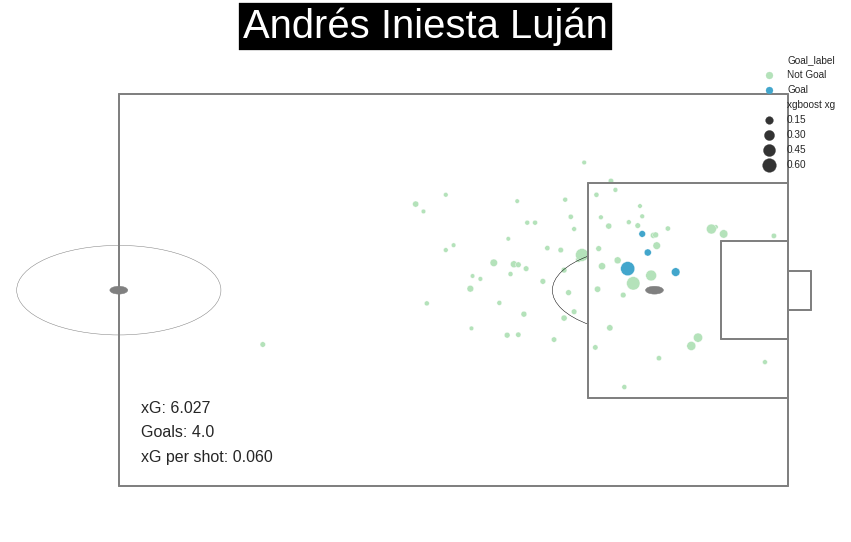

In [ ]:
iniesta_xg = shot_test_set_results[shot_test_set_results['player name']=='Andrés Iniesta Luján'].iloc[0:100]
#pitch = goals(plt,messi_xg[['x location shot','y location shot']].values,'grey','shots')
pitch = xGgoals(plt,iniesta_xg)
plt.show()

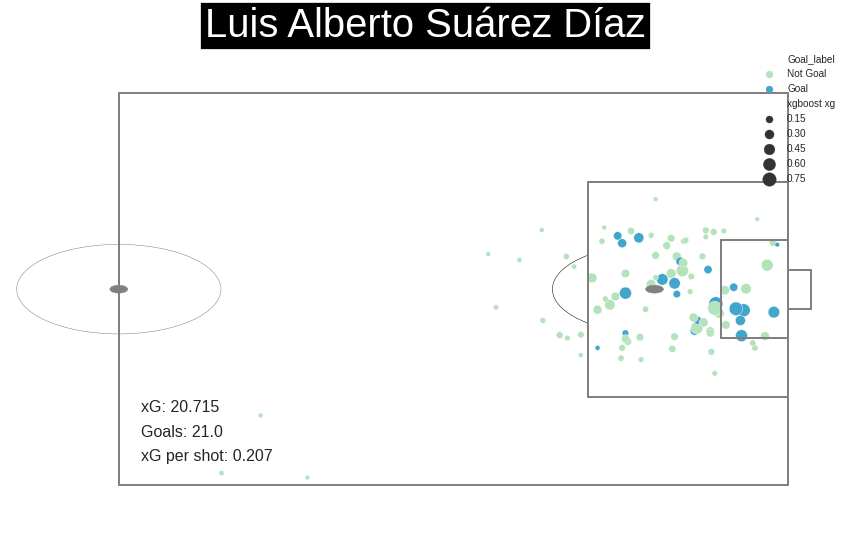

In [ ]:
suarez_xg = shot_test_set_results[shot_test_set_results['player name']=='Luis Alberto Suárez Díaz'].iloc[0:100]
#pitch = goals(plt,messi_xg[['x location shot','y location shot']].values,'grey','shots')
pitch = xGgoals(plt,suarez_xg)
plt.legend(loc='upper right')
plt.show()

In [ ]:
xG = suarez_xg['xgboost xg']
sum(xG)

20.71505815256387

In [ ]:
sum(suarez_xg['binary_outcome'])

21

In [ ]:
suarez_xg[suarez_xg['binary_outcome']==1]

play pattern  x location shot  \
shot id                                                                   
960244c0-89e9-4c13-9fa7-7bce075083ca      Regular Play            104.7   
7763c4e1-97b0-4882-8dc2-cca46cef0f4c      Regular Play            110.0   
f661b00e-40fb-42d9-93f6-98c6ac04bc49  Non Regular Play            105.4   
948c2ab6-dd52-4653-90bd-30dae2fbee5d      Regular Play            108.7   
85cee35b-08af-4e6e-958a-74cbf2f4562f  Non Regular Play            116.0   
c2ba5203-3604-49ea-b216-77d674ac7798      Regular Play            111.6   
5d43f733-31d0-4817-8e40-3f8ddcbb4480      Regular Play            111.9   
cbae956b-fdc1-413e-974b-5a0ff6a90d42  Non Regular Play            105.1   
a375787e-e59f-4528-8c15-23901eaec33b      Regular Play            110.3   
d21f3582-9ecc-4008-a50a-2e600b4ed187      Regular Play            105.4   
c2261b70-18e7-49bd-bc04-95829e0e9119  Non Regular Play            106.6   
d95a7ee7-06c9-47c1-9e7c-b2462c53eaf8      Regular Play            118.7   
7340f498-6d31-409b-b430-ba63d0be78f7      Regular Play            119.0   
d312d139-8415-4314-8b83-10d069f72453      Regular Play            115.3   
de66dbcb-e6fa-42a6-abef-262fe58ed82e      Regular Play            115.8   
c44c909f-5151-41d0-b69e-cbe165b2ec0d      Regular Play            113.5   
23b20175-dbed-4e86-964c-39d08109cdd6  Non Regular Play            115.1   
5b93289e-0ffe-4057-8649-a41ce1eb9132  Non Regular Play            112.8   
eec7929e-963f-4d07-bcf6-1cddf90b2ca2  Non Regular Play            102.9   
70a7e509-4fef-4e57-bd1f-8a8a89531076      Regular Play            115.7   
f9de5315-ed95-44ac-b20d-566921fa8044  Non Regular Play            109.8   

                                      y location shot  duration outcome  \
shot id                                                                   
960244c0-89e9-4c13-9fa7-7bce075083ca             29.1  0.801000    Goal   
7763c4e1-97b0-4882-8dc2-cca46cef0f4c             41.0  0.761201    Goal   
f661b00e-40fb-42d9-93f6-98c6ac04bc49             49.0  0.929000    Goal   
948c2ab6-dd52-4653-90bd-30dae2fbee5d             38.0  0.823003    Goal   
85cee35b-08af-4e6e-958a-74cbf2f4562f             44.3  0.361650    Goal   
c2ba5203-3604-49ea-b216-77d674ac7798             48.5  1.104064    Goal   
5d43f733-31d0-4817-8e40-3f8ddcbb4480             46.4  0.559180    Goal   
cbae956b-fdc1-413e-974b-5a0ff6a90d42             30.6  1.015001    Goal   
a375787e-e59f-4528-8c15-23901eaec33b             34.3  0.607000    Goal   
d21f3582-9ecc-4008-a50a-2e600b4ed187             40.8  0.852500    Goal   
c2261b70-18e7-49bd-bc04-95829e0e9119             29.5  1.619155    Goal   
d95a7ee7-06c9-47c1-9e7c-b2462c53eaf8             44.7  0.181000    Goal   
7340f498-6d31-409b-b430-ba63d0be78f7             30.9  1.884029    Goal   
d312d139-8415-4314-8b83-10d069f72453             44.0  0.330200    Goal   
de66dbcb-e6fa-42a6-abef-262fe58ed82e             49.5  0.516771    Goal   
c44c909f-5151-41d0-b69e-cbe165b2ec0d             43.0  0.364326    Goal   
23b20175-dbed-4e86-964c-39d08109cdd6             39.6  0.360200    Goal   
5b93289e-0ffe-4057-8649-a41ce1eb9132             36.0  0.536500    Goal   
eec7929e-963f-4d07-bcf6-1cddf90b2ca2             52.0  0.703920    Goal   
70a7e509-4fef-4e57-bd1f-8a8a89531076             46.4  0.238900    Goal   
f9de5315-ed95-44ac-b20d-566921fa8044             38.8  0.539228    Goal   

                                     technique used  first time  \
shot id                                                           
960244c0-89e9-4c13-9fa7-7bce075083ca         Normal       False   
7763c4e1-97b0-4882-8dc2-cca46cef0f4c         Volley        True   
f661b00e-40fb-42d9-93f6-98c6ac04bc49         Normal        True   
948c2ab6-dd52-4653-90bd-30dae2fbee5d         Normal       False   
85cee35b-08af-4e6e-958a-74cbf2f4562f         Normal        True   
c2ba5203-3604-49ea-b216-77d674ac7798       Backheel        True   
5d43f733-31d0-4817-8e40-3f8ddcbb4480         Volley   

In [ ]:
shot_test_set_results['player name']=='Lionel Andrés Messi Cuccittini'

shot id
a0492edc-3bb3-476a-9e61-e98b0dd2bdb2    False
a375787e-e59f-4528-8c15-23901eaec33b    False
983f7383-85d6-4cbf-bdee-72dccd671200    False
25c79d40-743f-45ae-a36d-f00640783a22     True
878c32a3-c121-4ffa-bfa0-738a741e2f5b     True
                                        ...  
6654969b-23c8-4839-8c89-38bbe77f802b    False
e7df34d7-954e-4dff-87ee-8eb50dca753b    False
38cc3ffa-0e0d-44c6-80e8-029f33481431    False
c17fb75f-ff3b-41ff-a2cd-73fc8c2877d5    False
fbd9abc1-ed96-4cd3-bdb1-2634c6753bf1     True
Name: player name, Length: 2569, dtype: bool

In [ ]:
season=shot_test_set_results.sort_values("season_id", ascending=False)
season['player name'].unique()

array(['Pedro González López', 'Lionel Andrés Messi Cuccittini',
       'Lucas René Olaza Catrofe', 'Jordi Alba Ramos',
       'Antoine Griezmann', 'Philippe Coutinho Correia', 'Anssumane Fati',
       'Martin Braithwaite Christensen', 'Lucas Ariel Ocampos',
       'Yannick Ferreira Carrasco', 'Raúl García Escudero',
       'Gerard Piqué Bernabéu', 'Luis Javier Suárez Charris',
       'Francisco Román Alarcón Suárez', 'Kevin Gameiro',
       'Iñaki Williams Arthuer', 'Ronald Federico Araújo da Silva',
       'Sofian Chakla', 'Adrián López Álvarez', 'Daniel Gómez Alcón',
       'Alberto Perea Correoso', 'Rubén Alcaraz Jiménez', 'Adnan Januzaj',
       'Javier Sánchez de Felipe', 'Iago Aspas Juncal',
       'José Manuel Fontán Mondragón', 'José Luis Morales Nogales',
       'Saúl Ñíguez Esclapez', 'Sergi Roberto Carnicer',
       'Alejandro Berenguer Remiro', 'Luis Jesús Rioja González',
       'Sergio Busquets i Burgos',
       'Francisco António Machado Mota de Castro Trincão',
       

In [ ]:
game_ids

0      16056
1     266056
2    3773523
3      69217
4    3773547
5      70220
6      69324
7      69186
8     303715
9       9860
Name: game_id, dtype: object

In [ ]:
for i in laliga['2017/2018']['9581'].json_file:
  print(i)

{'id': 'cb3b383b-7006-4bd0-9340-22601cf60fd0', 'index': 1, 'period': 1, 'timestamp': '00:00:00.000', 'minute': 0, 'second': 0, 'type': {'id': 35, 'name': 'Starting XI'}, 'possession': 1, 'possession_team': {'id': 206, 'name': 'Deportivo Alavés'}, 'play_pattern': {'id': 1, 'name': 'Regular Play'}, 'team': {'id': 206, 'name': 'Deportivo Alavés'}, 'duration': 0.0, 'tactics': {'formation': 451, 'lineup': [{'player': {'id': 6629, 'name': 'Fernando Pacheco Flores'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1}, {'player': {'id': 6856, 'name': 'Carlos Martín Vigaray'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 2}, {'player': {'id': 6614, 'name': 'Alexis Ruano Delgado'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 4}, {'player': {'id': 6636, 'name': 'Rodrigo Ely'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 12}, {'player': {'id': 6737, 'name': 'Alfonso Pedraza Sag'}, 'position': {'id': 6, 'name': 'Left Ba

In [ ]:
shot_test_set_results.sort_values("xgboost xg", ascending=ascending).reset_index()

shot id    play pattern  x location shot  \
0     6f86a3b1-3920-45b3-a665-ccd8637c5e02    Regular Play            118.1   
1     ef7616a9-3c46-48f6-85d1-63e44c7bdbbf   From Throw In            118.7   
2     c98924d9-6d2d-4926-94b8-bd30345298be   From Throw In            117.6   
3     480968e8-e042-41e3-96be-829bf9095dcf  From Goal Kick            116.7   
4     1036f2ff-836a-420d-83b9-93fad63c7c6f  From Free Kick            116.6   
...                                    ...             ...              ...   
2564  75902759-3ba3-40ab-8178-7e7c44d66382    Regular Play             81.2   
2565  91865391-dd80-4659-bbde-bdcd4d15c0f7     From Corner             89.8   
2566  3a2d7051-7a20-463c-aa6a-645354c5afea     From Corner             88.0   
2567  b0113fd2-21a3-4a36-aded-6eac82a6444f     From Corner             84.4   
2568  98dcc395-2126-45c1-961e-bb198ca8e595     From Corner             85.3   

      y location shot  duration technique used  first time  x gk location  \
0                37.3  0.426844         Normal        True          116.0   
1                36.5  0.286800         Normal        True          118.9   
2                40.0  0.510181         Normal        True          118.2   
3                39.9  0.361933         Normal        True          117.0   
4                39.0  0.601682         Normal        True          117.7   
...               ...       ...            ...         ...            ...   
2564             34.4  1.114503    Half Volley       False          118.6   
2565             49.8  0.901487    Half Volley       False          119.3   
2566             25.2  1.053058    Half Volley        True          119.7   
2567             45.8  1.766729    Half Volley        True          118.4   
2568             29.2  2.249027         Volley        True          118.2   

      y gk location   body part  ...    Pass Type  game_id  season_id  \
0              41.0   Left Foot  ...  Ground Pass    16056  2018/2019   
1              44.2   Left Foot  ...         None   266056  2015/2016   
2              37.5  Right Foot  ...  Ground Pass  3773523  2020/2021   
3              38.4  Right Foot  ...  Ground Pass    69217  2008/2009   
4              39.4       Other  ...         None  3773547  2020/2021   
...             ...         ...  ...          ...      ...        ...   
2564           38.0  Right Foot  ...    High Pass    69175  2006/2007   
2565           40.0  Right Foot  ...         None    69164  2005/2006   
2566           40.3   Left Foot  ...         None    69172  2005/2006   
2567           39.8   Left Foot  ...         None   265866  2014/2015   
2568           38.7  Right Foot  ...         None    69326  2011/2012   

     distance_from_goalpost_a distance_from_goalpost_b  shot_angle  \
0                    2.302173                 6.964194       108.5   
1                    1.392839                 7.611833       101.2   
2                    4.664762                 4.664762       118.1   
3                    5.108816                 5.263079       100.9   
4                    4.534314                 6.046487        97.2   
...                       ...                      ...         ...   
2564                38.832976                39.969989        11.5   
2565                33.203614                30.751911        13.7   
2566                33.773362                37.113879        11.8   
2567                36.924247                35.645477        12.5   
2568                35.360006                37.724395        12.0   

     shot distance gk distance           outcome xgboost xg  
0              3.3         4.1              Goal   0.834062  
1              3.7         4.3              Goal   0.815118  
2              2.4         3.1  Saved Off Target   0.794984  
3              3.3         3.4              Goal   0.793636  
4              3.5         2.4              Goal   0.766023  
...            ...         ...               ...        ...  
2564     

In [ ]:
map = shot_test_set_results.corr()[["official xg", "lightgbm xg", "xgboost xg","catboost xg"]].loc[["official xg", "lightgbm xg", "xgboost xg","catboost xg"]]

Text(0.5, 1.0, 'Binary Probability')

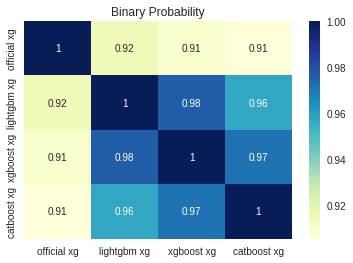

In [ ]:
sns.heatmap(map,cmap="YlGnBu",annot=True)
plt.title('Binary Probability')